# LEADS SCORE GROUP ASSIGNMENT

## Team members:
1. Truong Tuyet Lam
2. Satyam Shukla
3. Gushpu T

# Understanding Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Goals:
X Education would like to:
1. Select the most promising leads (i.e. the leads that are most likely to convert into paying customers by building a logistic regression model wherein each of the leads will be assigned a lead score (between 0 and 100) such that the customers with a higher lead score having higher coversion chance whereas the customers with a lower lead score having a lower conversion chance. The CEO in particular also has given a ballpark target leader conversion rate at around 80%.
2. Identify the top three variables which contribute the most towards the probabillity of a lead getting converted
3. Identify the top 3 most important categorical/dummy variables to focus on in order to increase the probability of lead conversion
4. Define a good strategy to maximize the conversion rate during the 2 months they have more intern headcounts as well as minimize the rate of useless phone-calls.

# Step 1: Data Understanding and Source the Data

#### 1. Importing all required libraries and explore to understand the dataset

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 2. Inspect the dataset

In [6]:
lead = pd.read_csv("Leads.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [7]:
#To understand the structure of the data set by looking at the number of rows and columns in the dataset
lead.shape

(9240, 37)

In [8]:
# Check info to see whether there are any missing values in any columns --> There are null values in some certain columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#To display the whole columns and rows
pd.set_option("display.max_columns",None)

In [10]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [11]:
# Check on number of null values of each column
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#To calculate the percentage of null value in each column
100*lead.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

##### Observation:
There are many columns containing null values. In particular, some columns (i.e. `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score`, `Lead Quality`) having more than 40% of rows having null values.

# Step 3: Cleaning the Data

In [13]:
#Define cut off at 40% of null value percentage to filter out those columns having high percentage of null value
cut_off=40
cols_to_drop=list(lead.columns[100*lead.isnull().mean()>cut_off])
print(cols_to_drop)

['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [14]:
#Drop columns having >40% null value
lead=lead.drop(cols_to_drop, axis=1)

In [15]:
# Recheck on the shape of dataframe after dropping columns:
lead.shape

(9240, 32)

In [16]:
# Recheck on the null values of each columns
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
100*lead.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [18]:
# Check on the value counts of those columns having null values

In [19]:
100*lead.Country.value_counts(normalize=True, dropna=False)

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Canada                   0.043290
Sweden                   0.032468
Italy                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Philippines              0.021645
Netherlands              0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Bangladesh               0.021645
Uganda                   0.021645
Russia

In [20]:
# convert the null value f 'Country' into 'unknown'
lead['Country'] = lead['Country'].fillna("Unknown")

In [21]:
100*lead.Country.value_counts(normalize=True, dropna=False)

Country
India                   70.259740
Unknown                 26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Canada                   0.043290
Sweden                   0.032468
Italy                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Philippines              0.021645
Netherlands              0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Bangladesh               0.021645
Uganda                   0.021645
Russia

In [22]:
100*lead.Specialization.value_counts(normalize=True, dropna=False)

Specialization
Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [23]:
# convert the null value f 'Specialization' into 'unknown'
lead['Specialization'] = lead['Specialization'].fillna("Unknown")

In [24]:
# Also to replace "Select" to "Unknown" as well since the customers did not select any options.

In [25]:
lead['Specialization'] = lead['Specialization'].replace("Select","Unknown")

In [26]:
100*lead.Specialization.value_counts(normalize=True, dropna=False)

Specialization
Unknown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [27]:
100*lead["How did you hear about X Education"].value_counts(normalize=True, dropna=False)

How did you hear about X Education
Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: proportion, dtype: float64

In [28]:
# convert the null value into 'unknown'
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna("Unknown")

In [29]:
# Similarly, we will replace "Select" with "Unknown" give customers did not choose any options.
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace("Select","Unknown")

In [30]:
100*lead["How did you hear about X Education"].value_counts(normalize=True, dropna=False)

How did you hear about X Education
Unknown                  78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: proportion, dtype: float64

In [31]:
100*lead["What is your current occupation"].value_counts(normalize=True, dropna=False)

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [32]:
# convert the null value into 'unknown'
lead['What is your current occupation'] = lead['What is your current occupation'].fillna("Unknown")

In [33]:
100*lead["What is your current occupation"].value_counts(normalize=True, dropna=False)

What is your current occupation
Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [34]:
100*lead["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False)

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [35]:
# convert the null value into 'unknown'
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna("Unknown")

In [36]:
100*lead["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False)

What matters most to you in choosing a course
Better Career Prospects      70.649351
Unknown                      29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [37]:
100*lead.Tags.value_counts(normalize=True, dropna=False)

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

In [38]:
# convert the null value into 'unknown'
lead['Tags'] = lead['Tags'].fillna("Unknown")

In [39]:
100*lead.Tags.value_counts(normalize=True, dropna=False)

Tags
Unknown                                              36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

In [40]:
100*lead["Lead Profile"].value_counts(normalize=True, dropna=False)

Lead Profile
Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: proportion, dtype: float64

In [41]:
# convert the null value into 'unknown'
lead['Lead Profile'] = lead['Lead Profile'].fillna("Unknown")

In [42]:
# Similarly, we will also replace "Select" with "Unknown"
lead['Lead Profile'] = lead ['Lead Profile'].replace("Select","Unknown")

In [43]:
100*lead["Lead Profile"].value_counts(normalize=True, dropna=False)

Lead Profile
Unknown                        74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: proportion, dtype: float64

In [44]:
100*lead.City.value_counts(normalize=True, dropna=False)

City
Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

In [45]:
# convert the null value into 'unknown'
lead['City'] = lead['City'].fillna("Unknown")

In [46]:
# Replace "Select" with "Unknown"
lead['City'] = lead['City'].replace("Select","Unknown")

In [47]:
100*lead.City.value_counts(normalize=True, dropna=False)

City
Unknown                        39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

#### Check on the data of binary columns

In [48]:
binary_cols=[]          # create a place to store binary columns
other_cols=[]            # create a place to other columns
for i in lead.columns:
    if lead[i].nunique()==2:     
        binary_cols.append(i)
    else:
        other_cols.append(i)

In [49]:
lead[binary_cols].columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [50]:
lead["Do Not Email"].value_counts(normalize=True)

Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64

##### Observation:
92% of customers selected not want to be emailed about the course. The data of this column is skewed towards a response, implying imbalance. Therefore, we should exclude this column out.

In [51]:
lead["Do Not Call"].value_counts(normalize=True)

Do Not Call
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [52]:
lead["Search"].value_counts(normalize=True)

Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64

In [53]:
lead["Newspaper Article"].value_counts(normalize=True)

Newspaper Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [54]:
lead["X Education Forums"].value_counts(normalize=True)

X Education Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [55]:
lead["Newspaper"].value_counts(normalize=True)

Newspaper
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [56]:
lead["Digital Advertisement"].value_counts(normalize=True)

Digital Advertisement
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64

In [57]:
lead["Through Recommendations"].value_counts(normalize=True)

Through Recommendations
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64

##### Observation:
Similarly, 99% of customers skewed towards a response of these columns, implying imbalance. Therefore, we should exclude these columns out
- `Do Not Email`
- `Do Not Call`
- `Search`
- `Newspaper Article`
- `X Education Forums`
- `Newspaper`
- `Digital Advertisement`
- `Through Recommendations`

In [58]:
lead["Converted"].value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

In [59]:
lead["A free copy of Mastering The Interview"].value_counts(normalize=True)

A free copy of Mastering The Interview
No     0.687446
Yes    0.312554
Name: proportion, dtype: float64

In [60]:
# Understand the columns in integer format
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [61]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Check on data of remaining categorical columns

In [62]:
lead.Magazine.value_counts(normalize=True)

Magazine
No    1.0
Name: proportion, dtype: float64

In [63]:
lead["Receive More Updates About Our Courses"].value_counts(normalize=True)

Receive More Updates About Our Courses
No    1.0
Name: proportion, dtype: float64

In [64]:
lead["Update me on Supply Chain Content"].value_counts(normalize=True)

Update me on Supply Chain Content
No    1.0
Name: proportion, dtype: float64

In [65]:
lead["Get updates on DM Content"].value_counts(normalize=True)

Get updates on DM Content
No    1.0
Name: proportion, dtype: float64

In [66]:
lead["I agree to pay the amount through cheque"].value_counts(normalize=True)

I agree to pay the amount through cheque
No    1.0
Name: proportion, dtype: float64

##### Observation
These columns have unbalanced data, 100% of response showing 'No'. Thus, it brings no value into our analysis, therefore, we can remove these columns: 
- `Magazine`
- `Receive More Updates About Our Courses`
- `Update me on Supply Chain Content`
- `Get updates on DM Content`
- `I agree to pay the amount through cheque`

In [67]:
lead["Lead Origin"].value_counts(normalize=True, dropna = False)

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64

In [68]:
lead["Lead Source"].value_counts(normalize=True, dropna = False)

Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Social Media         0.000216
Press_Release        0.000216
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64

##### Observation:
There is only small percentage of missing values of this column. We can replace missing value with mode "Google".

In [69]:
lead["Lead Source"]=lead["Lead Source"].fillna("Google")

In [70]:
lead["Lead Source"].value_counts(normalize=True, dropna = False)

Lead Source
Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Social Media         0.000216
Press_Release        0.000216
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64

In [71]:
lead["Last Activity"].value_counts(normalize=True, dropna = False)

Last Activity
Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: proportion, dtype: float64

##### Observation:
There is only small percentage of missing values of this column. We can replace missing value with mode "Email Opened".

In [72]:
lead["Last Activity"] = lead["Last Activity"].fillna("Email Opened")

In [73]:
lead["Last Activity"].value_counts(normalize=True, dropna = False)

Last Activity
Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: proportion, dtype: float64

In [74]:
lead["Last Notable Activity"].value_counts(normalize=True, dropna = False)

Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: proportion, dtype: float64

In [75]:
#### Check on numerical data
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [76]:
lead["Lead Number"].describe()

count      9240.000000
mean     617188.435606
std       23405.995698
min      579533.000000
25%      596484.500000
50%      615479.000000
75%      637387.250000
max      660737.000000
Name: Lead Number, dtype: float64

In [77]:
# All numerical variables in the dataset
lead_num = lead.select_dtypes(include=["int64", "float64"])
lead_num.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  
0                   0.0  
1                   2.5  
2                   2.0  
3                   1.0  
4                   1.0

In [78]:
lead.shape

(9240, 32)

In [79]:
null_counts = lead[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]].isnull().sum()
print(null_counts)

TotalVisits                    137
Total Time Spent on Website      0
Page Views Per Visit           137
dtype: int64


In [80]:
# Treat missing values for 'TotalVisits' and 'Page Views Per Visit'
lead["TotalVisits"].mean()

np.float64(3.445237833681204)

In [81]:
# Replace missing values with meanscore
lead["TotalVisits"].fillna(3.44).astype(int)

0       0
1       5
2       2
3       1
4       2
       ..
9235    8
9236    2
9237    2
9238    3
9239    6
Name: TotalVisits, Length: 9240, dtype: int64

In [82]:
# Recheck the mean score of 'TotalVisits' column
lead["TotalVisits"].mean()

np.float64(3.445237833681204)

In [83]:
lead["TotalVisits"].isnull().sum()

np.int64(137)

In [84]:
# Treat missing values for 'Page Views Per Visit' and 'Page Views Per Visit'
lead["Page Views Per Visit"].mean()

np.float64(2.3628199494672084)

In [85]:
# Replace missing values with meanscore
lead["Page Views Per Visit"].fillna(2.36).astype(int)

0       0
1       2
2       2
3       1
4       1
       ..
9235    2
9236    2
9237    2
9238    3
9239    3
Name: Page Views Per Visit, Length: 9240, dtype: int64

In [86]:
# Recheck the mean score
lead["Page Views Per Visit"].mean()

np.float64(2.3628199494672084)

In [87]:
lead["Page Views Per Visit"].isnull().sum()

np.int64(137)

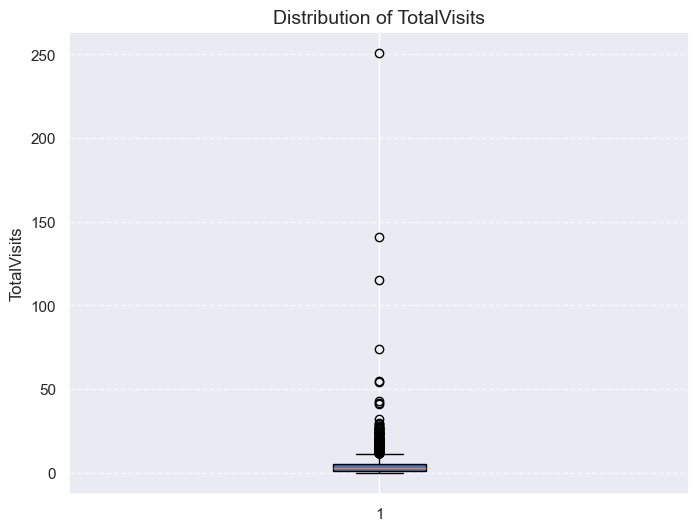

In [88]:
# Create a boxplot for the 'TotalVisits' column
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(lead["TotalVisits"].dropna(), vert=True, patch_artist=True)

# Add labels and title
plt.title("Distribution of TotalVisits", fontsize=14)
plt.ylabel("TotalVisits", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity

# Show the plot
plt.show()

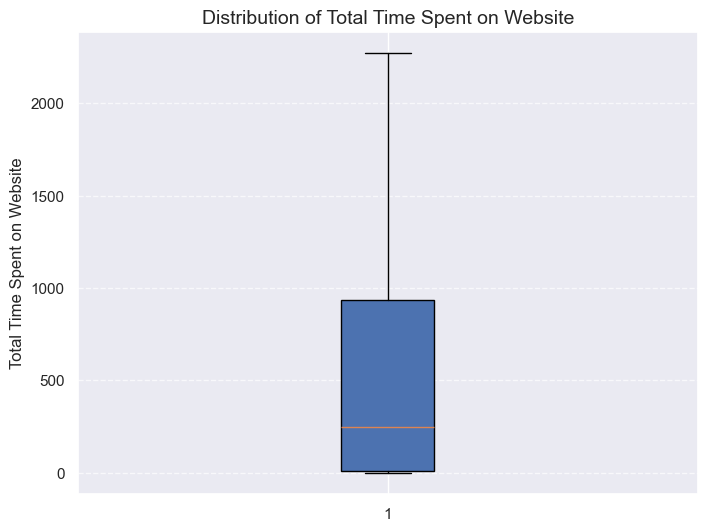

In [89]:
# Create a boxplot for the 'TotalVisits' column
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(lead["Total Time Spent on Website"].dropna(), vert=True, patch_artist=True)

# Add labels and title
plt.title("Distribution of Total Time Spent on Website", fontsize=14)
plt.ylabel("Total Time Spent on Website", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity

# Show the plot
plt.show()

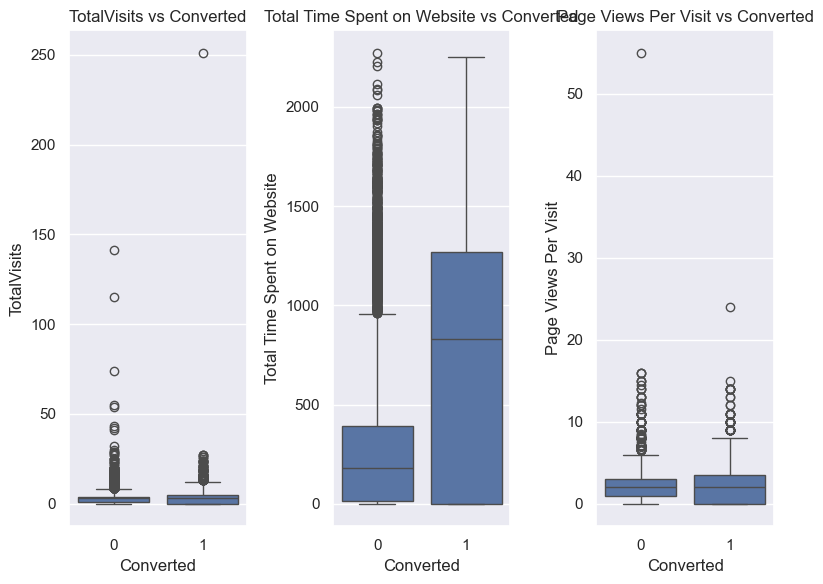

In [90]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x="Converted", y="TotalVisits", data=lead)
plt.title("TotalVisits vs Converted")
plt.subplot(1, 3, 2)
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=lead)
plt.title("Total Time Spent on Website vs Converted")
plt.subplot(1, 3, 3)
sns.boxplot(x="Converted", y="Page Views Per Visit", data=lead)
plt.title("Page Views Per Visit vs Converted")
plt.tight_layout()  # Adjusts spacing between plots
plt.show()

##### Observation:
There are a lot of outliers for these 3 numerical columns. Need to fix these outliers

In [91]:
#Handling outliers of TotalVisits column, replace outliers with the values at upper-bound and lower-bound
q1_1=lead["TotalVisits"].describe()["25%"]  # 25th Percentile
q3_1=lead["TotalVisits"].describe()["75%"]  # 75th Percentile
iqr_1=q3_1-q1_1
upper_bound=q3_1+1.5*iqr_1
lower_bound=q1_1-1.5*iqr_1
print(lower_bound, upper_bound)

-5.0 11.0


In [92]:
#np.where(condition, do this if condition is true, do this if condiction is false)
lead["TotalVisits"]=np.where(lead["TotalVisits"]>upper_bound,upper_bound,lead["TotalVisits"])

Text(0.5, 1.0, 'TotalVisits vs Converted')

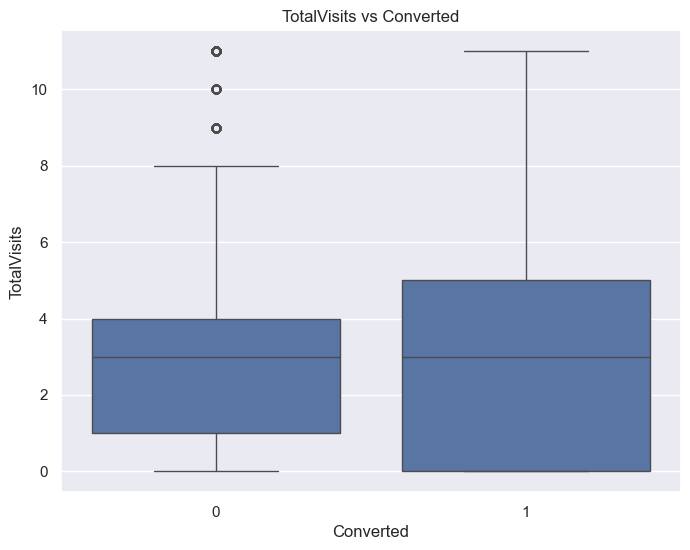

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Converted", y="TotalVisits", data=lead)
plt.title("TotalVisits vs Converted")

In [94]:
#Handling outliers of "Total time spent on website" column, replace outliers with the values at upper-bound and lower-bound
q1_2=lead["Total Time Spent on Website"].describe()["25%"]  # 25th Percentile
q3_2=lead["Total Time Spent on Website"].describe()["75%"]  # 75th Percentile
iqr_2=q3_2-q1_2
upper_bound_2=q3_2+1.5*iqr_2
lower_bound_2=q1_2-1.5*iqr_2
print(lower_bound_2, upper_bound_2)

-1374.0 2322.0


In [95]:
#np.where(condition, do this if condition is true, do this if condiction is false)
lead["Total Time Spent on Website"]=np.where(lead["Total Time Spent on Website"]>upper_bound_2,upper_bound_2,lead["Total Time Spent on Website"])

Text(0.5, 1.0, 'Total Time Spent on Website vs Converted')

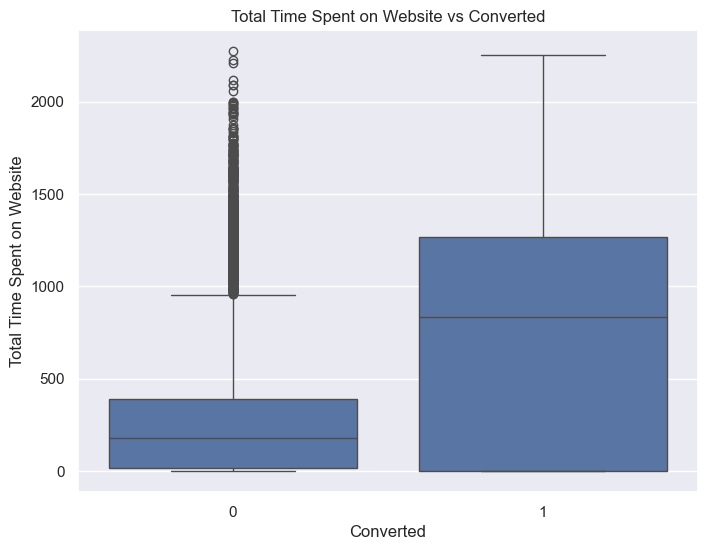

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=lead)
plt.title("Total Time Spent on Website vs Converted")

In [97]:
#Handling outliers of "Page views per visit" column, replace outliers with the values at upper-bound and lower-bound
q1_3=lead["Page Views Per Visit"].describe()["25%"]  # 25th Percentile
q3_3=lead["Page Views Per Visit"].describe()["75%"]  # 75th Percentile
iqr_3=q3_3-q1_3
upper_bound_3=q3_3+1.5*iqr_3
lower_bound_3=q1_3-1.5*iqr_3
print(lower_bound_3, upper_bound_3)

-2.0 6.0


In [98]:
#np.where(condition, do this if condition is true, do this if condiction is false)
lead["Page Views Per Visit"]=np.where(lead["Page Views Per Visit"]>upper_bound_3,upper_bound_3,lead["Page Views Per Visit"])

Text(0.5, 1.0, 'Page Views Per Visit vs Converted')

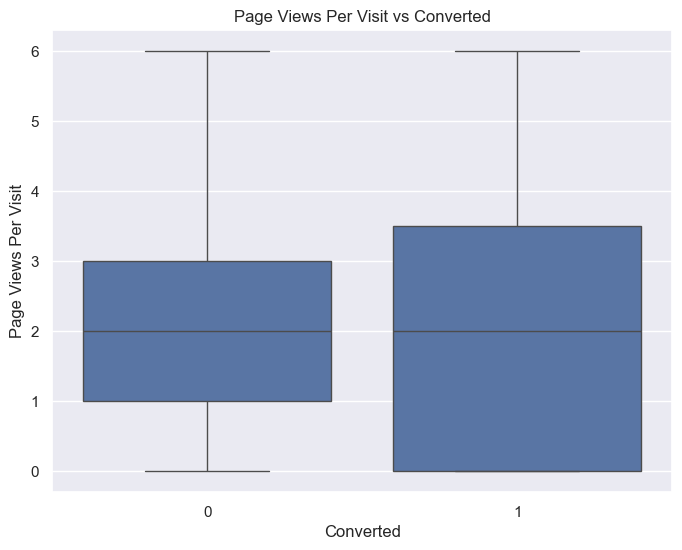

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Converted", y="Page Views Per Visit", data=lead)
plt.title("Page Views Per Visit vs Converted")

In [100]:
# Now let's drop all the columns that bring no values given above explanations

In [101]:
lead=lead.drop(["Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article",
               "X Education Forums", "Newspaper", "Digital Advertisement",
               "Through Recommendations", "Receive More Updates About Our Courses",
               "Update me on Supply Chain Content", "Get updates on DM Content", 
               "I agree to pay the amount through cheque"], axis=1)

In [102]:
lead.shape

(9240, 19)

In [103]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   float64
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [104]:
#Create 2 filters for target variable
Convert=lead[lead["Converted"] == 1]
Non_convert=lead[lead["Converted"] == 0]

In [105]:
Convert.head()

Prospect ID  Lead Number  \
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   

                Lead Origin     Lead Source  Converted  TotalVisits  \
2   Landing Page Submission  Direct Traffic          1          2.0   
4   Landing Page Submission          Google          1          2.0   
6   Landing Page Submission          Google          1          2.0   
10  Landing Page Submission  Organic Search          1          8.0   
11  Landing Page Submission  Direct Traffic          1          8.0   

    Total Time Spent on Website  Page Views Per Visit  \
2                        1532.0                  2.00   
4                        1428.0                  1.00   
6                        1640.0                  2.00   
10                       1351.0                  6.00   
11                       1343.0                  2.67   

              Last Activity Country             Specialization  \
2              Email Opened   India    Business Administration   
4         Converted to Lead   India                    Unknown   
6              Email Opened   India    Supply Chain Management   
10             Email Opened   India         Travel and Tourism   
11  Page Visited on Website   India  Human Resource Management   

   How did you hear about X Education What is your current occupation  \
2                             Unknown                         Student   
4                               Other                      Unemployed   
6                       Online Search                      Unemployed   
10                            Unknown                      Unemployed   
11                            Unknown                      Unemployed   

   What matters most to you in choosing a course  \
2                        Better Career Prospects   
4                        Better Career Prospects   
6                        Better Career Prospects   
10                       Better Career Prospects   
11                       Better Career Prospects   

                                   Tags    Lead Profile                City  \
2   Will revert after reading the email  Potential Lead              Mumbai   
4   Will revert after reading the email         Unknown              Mumbai   
6   Will revert after reading the email  Potential Lead              Mumbai   
10  Will revert after reading the email         Unknown  Other Metro Cities   
11                         Lost to EINS         Unknown   Thane & Outskirts   

   A free copy of Mastering The Interview    Last Notable Activity  
2                                     Yes             Email Opened  
4                                      No                 Modified  
6                                      No                 Modified  
10                                    Yes             Email Opened  
11                                    Yes  Page Visited on Website

In [106]:
Non_convert.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                          0.0   
1  Organic Search          0          5.0                        674.0   
3  Direct Traffic          0          1.0                        305.0   
5      Olark Chat          0          0.0                          0.0   
7      Olark Chat          0          0.0                          0.0   

   Page Views Per Visit            Last Activity  Country  \
0                   0.0  Page Visited on Website  Unknown   
1                   2.5             Email Opened    India   
3                   1.0              Unreachable    India   
5                   0.0  Olark Chat Conversation  Unknown   
7                   0.0  Olark Chat Conversation  Unknown   

          Specialization How did you hear about X Education  \
0                Unknown                            Unknown   
1                Unknown                            Unknown   
3  Media and Advertising                      Word Of Mouth   
5                Unknown                            Unknown   
7                Unknown                            Unknown   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
3                      Unemployed   
5                         Unknown   
7                         Unknown   

  What matters most to you in choosing a course                         Tags  \
0                       Better Career Prospects  Interested in other courses   
1                       Better Career Prospects                      Ringing   
3                       Better Career Prospects                      Ringing   
5                                       Unknown                      Unknown   
7                                       Unknown                      Unknown   

  Lead Profile     City A free copy of Mastering The Interview  \
0      Unknown  Unknown                                     No   
1      Unknown  Unknown                                     No   
3      Unknown   Mumbai                                     No   
5      Unknown  Unknown                                     No   
7      Unknown  Unknown                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
3              Modified  
5              Modified  
7              Modified

# Step 4: Conduct Exploratory Data Analysis

### Lead Origin

In [107]:
lead["Lead Origin"].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [108]:
100*lead["Lead Origin"].value_counts(normalize=True).round(2)

Lead Origin
Landing Page Submission    53.0
API                        39.0
Lead Add Form               8.0
Lead Import                 1.0
Quick Add Form              0.0
Name: proportion, dtype: float64

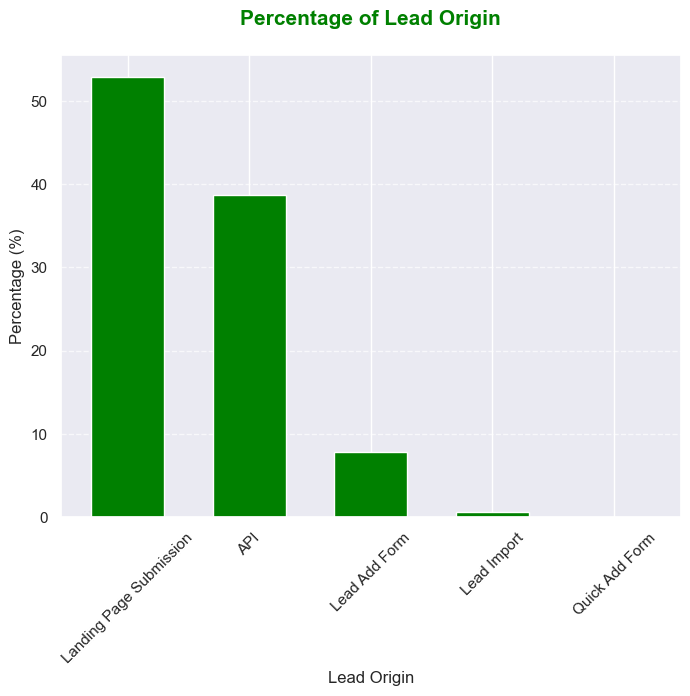

In [109]:
# Calculate percentages and multiply by 100 for 100% scale
lead_origin_percentage = lead["Lead Origin"].value_counts(normalize=True) * 100

# Plot the bar chart
lead_origin_percentage.plot.bar(
    color='green',  # Set bar color
    figsize=(8, 6),   # Adjust figure size
    width=0.6         # Adjust bar width
)

# Add and format title
plt.title(
    "Percentage of Lead Origin\n",
    fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'}
)

# Add labels for axes
plt.xlabel("Lead Origin", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

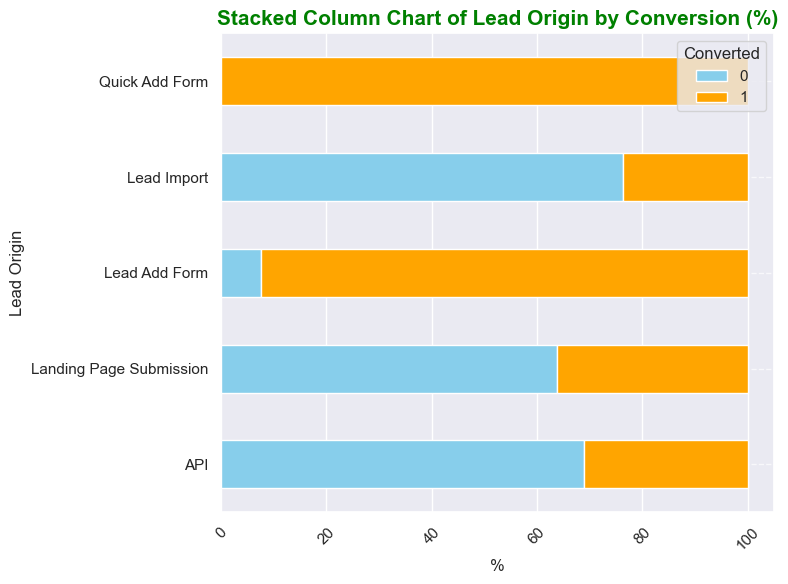

In [110]:
# Create a crosstab to count occurrences and normalize to 100% for each category
stacked_data = pd.crosstab(lead["Lead Origin"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Origin
sample_sizes = pd.crosstab(lead["Lead Source"], lead["Converted"]).sum(axis=1)

# Plot a stacked bar chart
stacked_data.plot(kind="barh", stacked=True, figsize=(8, 6), color=["skyblue", "orange"])

# Add labels, title, and legend
plt.title("Stacked Column Chart of Lead Origin by Conversion (%)", fontsize=15, fontweight='bold', color='Green')
plt.xlabel("%", fontsize=12)
plt.ylabel("Lead Origin", fontsize=12)
plt.legend(title="Converted", loc="upper right")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### Observations:
- "Landing page submission" (53%) and "API" (39%) are the most 2 popular origins of lead.
- Next is "Lead Add Form" (8%).
- "Landing page submission" also have higher conversion rate than "API".
- "Lead Add Form" though is less popular, yet the ratio of conversion rate is very high

### Lead Source

In [111]:
lead["Lead Source"].value_counts()

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [112]:
# Since there are many responses having very small data, let's group them all into "Others" to simplify the variable list later on
lead["Lead Source"] = lead["Lead Source"].replace({'bing': 'Others',
                                                   'google': 'Others',
                                                   'Click2call': 'Others',
                                                   'Live Chat': 'Others',
                                                   'Social Media': 'Others',
                                                   'Press_Release': 'Others',
                                                   'Pay per Click Ads': 'Others',
                                                   'blog': 'Others',
                                                   'WeLearn': 'Others',
                                                   'welearnblog_Home': 'Others',
                                                   'youtubechannel': 'Others',
                                                   'testone': 'Others',
                                                   'NC_EDM': 'Others', })

In [113]:
100*lead["Lead Source"].value_counts(normalize=True).round(2)

Lead Source
Google              31.0
Direct Traffic      28.0
Olark Chat          19.0
Organic Search      12.0
Reference            6.0
Welingak Website     2.0
Referral Sites       1.0
Facebook             1.0
Others               0.0
Name: proportion, dtype: float64

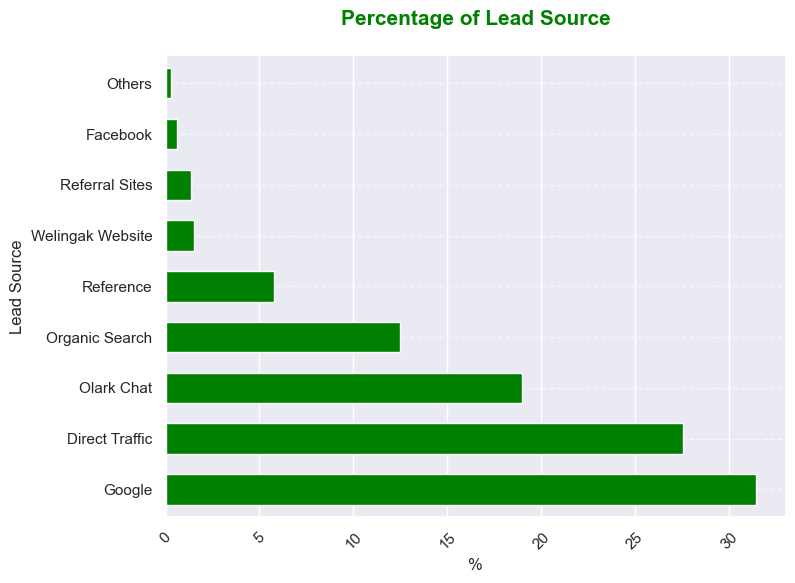

In [114]:
# Sketch out the chart for Lead Source
lead_source_percentage = lead["Lead Source"].value_counts(normalize=True) * 100

# Plot the bar chart
lead_source_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Lead Source\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Lead Source", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

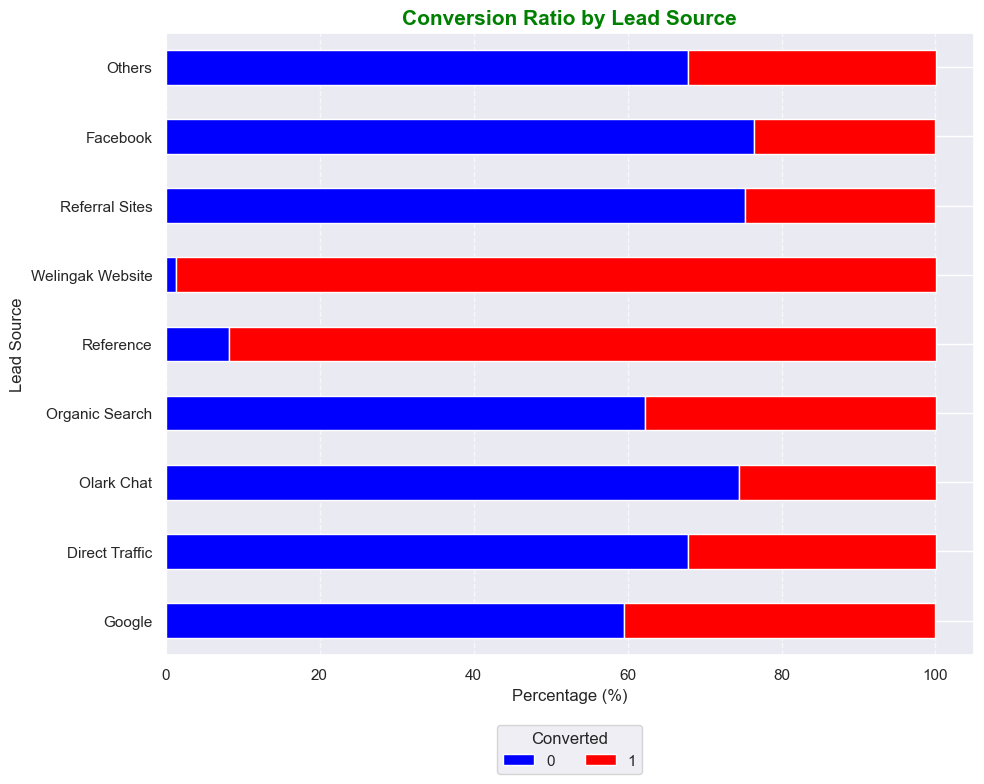

In [115]:
# Compute the ratio of conversion for each Lead Source (normalized to 100%)
stacked_data = pd.crosstab(lead["Lead Source"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes = pd.crosstab(lead["Lead Source"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_data = stacked_data.loc[sample_sizes.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Lead Source", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Lead Source", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [116]:
print(stacked_data)

Converted                 0          1
Lead Source                           
Google            59.504132  40.495868
Direct Traffic    67.833268  32.166732
Olark Chat        74.472934  25.527066
Organic Search    62.218371  37.781629
Reference          8.239700  91.760300
Welingak Website   1.408451  98.591549
Referral Sites    75.200000  24.800000
Facebook          76.363636  23.636364
Others            67.857143  32.142857


##### Observations:
- "Google", "Direct Traffic" and "Olark Chat" are the top 3 most common channel of Lead Source.
- Another channels that are also potential to focus with lower percentage of Lead Source include "Organic Search", "Reference" and "Welingak Website".
- Among those channel, "Reference" and "Welingak Website" have much higher conversion rate though being less popular.

### TotalVisits

In [117]:
lead.TotalVisits.value_counts()

TotalVisits
0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
11.0     353
7.0      309
8.0      224
9.0      164
10.0     114
Name: count, dtype: int64

In [118]:
lead.TotalVisits.value_counts(normalize=True).round(2)*100

TotalVisits
0.0     24.0
2.0     18.0
3.0     14.0
4.0     12.0
5.0      9.0
6.0      5.0
1.0      4.0
11.0     4.0
7.0      3.0
8.0      2.0
9.0      2.0
10.0     1.0
Name: proportion, dtype: float64

In [119]:
lead.TotalVisits.describe()

count    9103.000000
mean        3.220696
std         2.881792
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalVisits, dtype: float64

Text(0.5, 1.0, 'TotalVisits vs Converted')

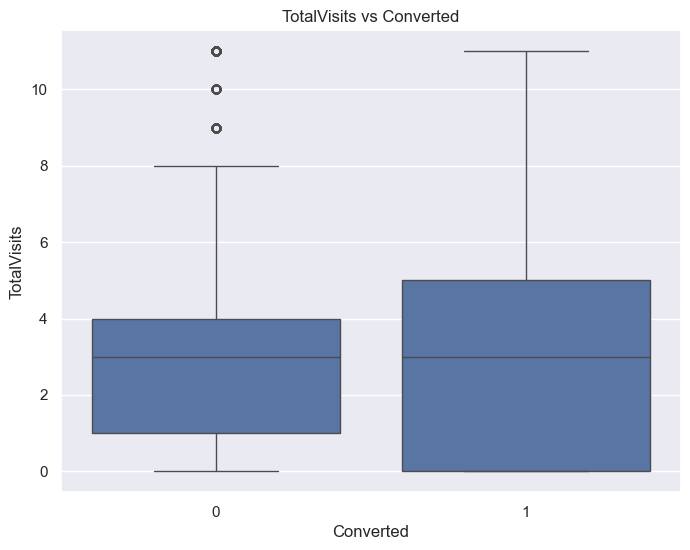

In [120]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Converted", y="TotalVisits", data=lead)
plt.title("TotalVisits vs Converted")

##### Observations:
- On average, the customers tend to visit 3.2 times and the frequency varies from a range of 1 - 5 times.
- The meanscore between converted and non-converted is quite similar, however, the range of 2 groups is quite different, given the frequency of visits among those being converted is higher than those not converted.
- Thus, `TotalVisits` might be consider as one of important factors to look at when defining potential lead.

### Total Time Spent on Website

In [121]:
lead["Total Time Spent on Website"].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [122]:
lead["Total Time Spent on Website"].value_counts()

Total Time Spent on Website
0.0       2193
60.0        19
75.0        18
74.0        18
127.0       18
          ... 
988.0        1
1776.0       1
1846.0       1
1736.0       1
1235.0       1
Name: count, Length: 1731, dtype: int64

In [123]:
lead["Total Time Spent on Website"] = pd.to_numeric(lead["Total Time Spent on Website"], errors='coerce')
# Break the responses of "Total Time Spent on Website" into smaller ranges
# Define bin edges
bins = [0, 60, 120, 180, 2272]

# Assign labels to the bins
labels = ['<=60', '60-120', '120-180', '>180']
lead['Range_Time_Spent_Website'] = pd.cut(lead["Total Time Spent on Website"], bins=bins, labels=labels, right=False)
lead['Range_Time_Spent_Website'].head()

0    <=60
1    >180
2    >180
3    >180
4    >180
Name: Range_Time_Spent_Website, dtype: category
Categories (4, object): ['<=60' < '60-120' < '120-180' < '>180']

In [124]:
lead['Range_Time_Spent_Website'].value_counts(normalize=True)

Range_Time_Spent_Website
>180       0.566079
<=60       0.302522
60-120     0.068081
120-180    0.063319
Name: proportion, dtype: float64

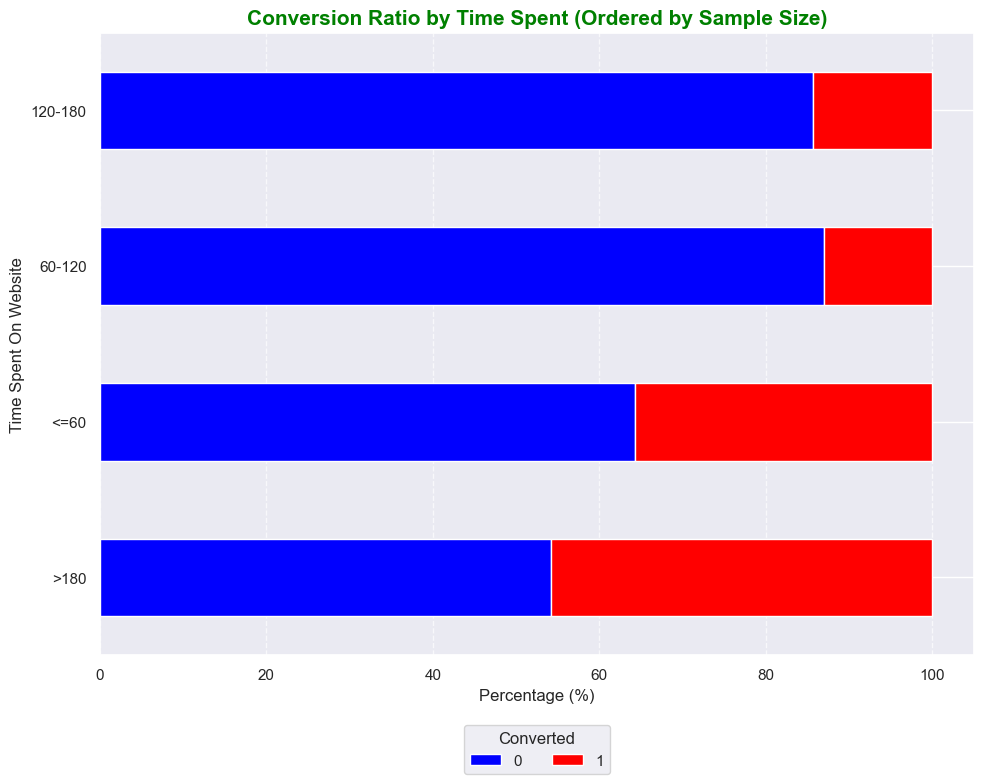

In [125]:
# Compute the ratio of conversion for each range of time spent on website (normalized to 100%)
stacked_time_spent_data = pd.crosstab(lead["Range_Time_Spent_Website"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each range of time spent on website
sample_sizes_2 = pd.crosstab(lead["Range_Time_Spent_Website"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_time_spent_data = stacked_time_spent_data.loc[sample_sizes_2.sort_values(ascending=False).index]

# Plot a stacked horizontal bar chart
ax = stacked_time_spent_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)
# Customize title and axis labels
plt.title("Conversion Ratio by Time Spent (Ordered by Sample Size)", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Time Spent On Website", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better readability
plt.show()


In [126]:
print(stacked_time_spent_data)

Converted                         0          1
Range_Time_Spent_Website                      
>180                      54.206501  45.793499
<=60                      64.221825  35.778175
60-120                    86.963434  13.036566
120-180                   85.641026  14.358974


##### Observations:
- 56% of students spend more than 3 hours on the website.
- Among those who spent >180, 46% of them are converted.
- Therefore, the conversion rate is much higher among those spending more time on website.
- Thus, `Total Time Spent on Website` can also be considered as another critical factor contributing to conversion rate.

##### Page Views Per Visit

In [127]:
lead["Page Views Per Visit"].describe()

count    9103.000000
mean        2.258944
std         1.792536
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

In [128]:
lead["Page Views Per Visit"].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.17       1
1.19       1
3.82       1
1.93       1
2.08       1
Name: count, Length: 91, dtype: int64

In [129]:
lead["Page Views Per Visit"] = pd.to_numeric(lead["Page Views Per Visit"], errors='coerce')
# Break the responses of "Page Views Per Visit" into smaller ranges
# Define bin edges
bins = [0, 1, 2, 3, 4, 6]

# Assign labels to the bins
labels = ['<=1 page', '1-2 pages', '2-3 pages', '3-4 pages', '>4 pages']
lead['Range_Page_View_Per_Visit'] = pd.cut(lead["Page Views Per Visit"], bins=bins, labels=labels, right=False)
lead['Range_Page_View_Per_Visit'].head()

0     <=1 page
1    2-3 pages
2    2-3 pages
3    1-2 pages
4    1-2 pages
Name: Range_Page_View_Per_Visit, dtype: category
Categories (5, object): ['<=1 page' < '1-2 pages' < '2-3 pages' < '3-4 pages' < '>4 pages']

In [130]:
lead['Range_Page_View_Per_Visit'].value_counts(normalize=True)*100

Range_Page_View_Per_Visit
2-3 pages    26.297211
<=1 page     25.755971
>4 pages     17.684433
3-4 pages    16.001883
1-2 pages    14.260501
Name: proportion, dtype: float64

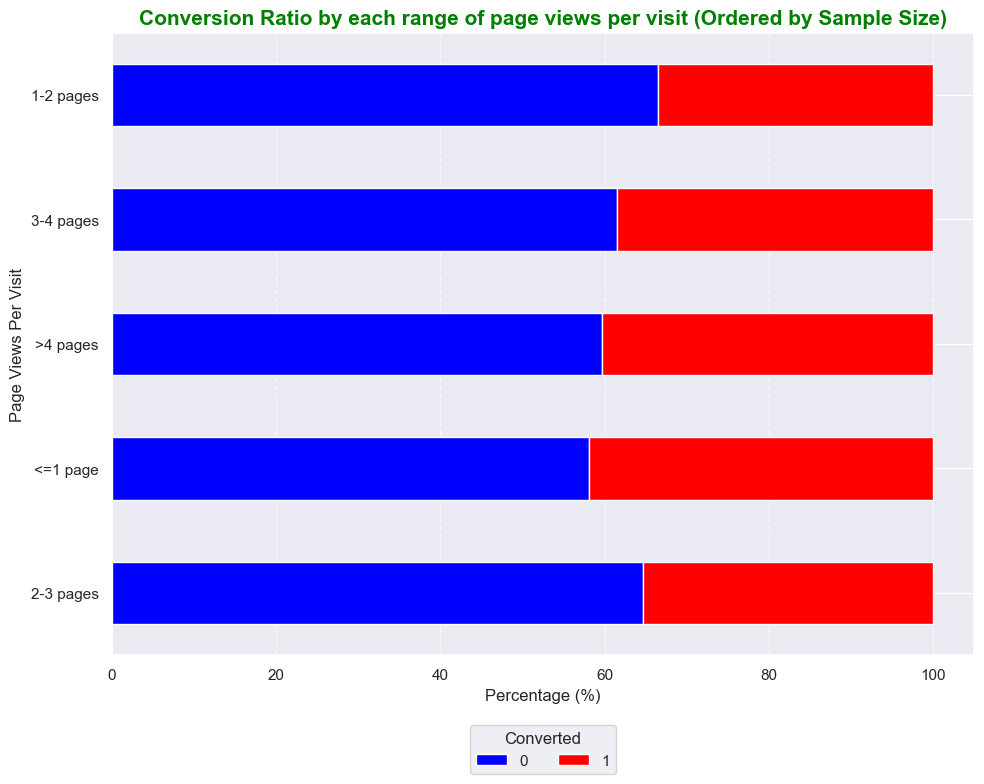

In [131]:
# Compute the ratio of conversion for each range of page view per visit (normalized to 100%)
stacked_page_view_data = pd.crosstab(lead["Range_Page_View_Per_Visit"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each range of page view per visit
sample_sizes_3 = pd.crosstab(lead["Range_Page_View_Per_Visit"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_page_view_data = stacked_page_view_data.loc[sample_sizes_3.sort_values(ascending=False).index]

# Plot a stacked horizontal bar chart
ax = stacked_page_view_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)
# Customize title and axis labels
plt.title("Conversion Ratio by each range of page views per visit (Ordered by Sample Size)", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Page Views Per Visit", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better readability
plt.show()

In [132]:
print(stacked_page_view_data)

Converted                          0          1
Range_Page_View_Per_Visit                      
2-3 pages                  64.653244  35.346756
<=1 page                   58.154408  41.845592
>4 pages                   59.747172  40.252828
3-4 pages                  61.544118  38.455882
1-2 pages                  66.501650  33.498350


##### Observation
There is no significant difference in terms of number of pages view per visit of customers across ranges. Thus, this factor seems not be a key factor to differentiate the behaviours for conversion.

##### Last Activity

In [133]:
lead["Last Activity"].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [134]:
# Since there are many responses having very small data, let's group them all into "Others" to simplify the variable list later on
lead["Last Activity"] = lead["Last Activity"].replace({'Approached upfront': 'Others',
                                                   'View in browser link Clicked': 'Others',
                                                   'Email Marked Spam': 'Others',
                                                   'Email Received': 'Others',
                                                   'Resubscribed to emails': 'Others',
                                                   'Visited Booth in Tradeshow': 'Others'})

In [135]:
100*lead["Last Activity"].value_counts(normalize=True).round(2)

Last Activity
Email Opened                 38.0
SMS Sent                     30.0
Olark Chat Conversation      11.0
Page Visited on Website       7.0
Converted to Lead             5.0
Email Bounced                 4.0
Email Link Clicked            3.0
Form Submitted on Website     1.0
Unreachable                   1.0
Unsubscribed                  1.0
Had a Phone Conversation      0.0
Others                        0.0
Name: proportion, dtype: float64

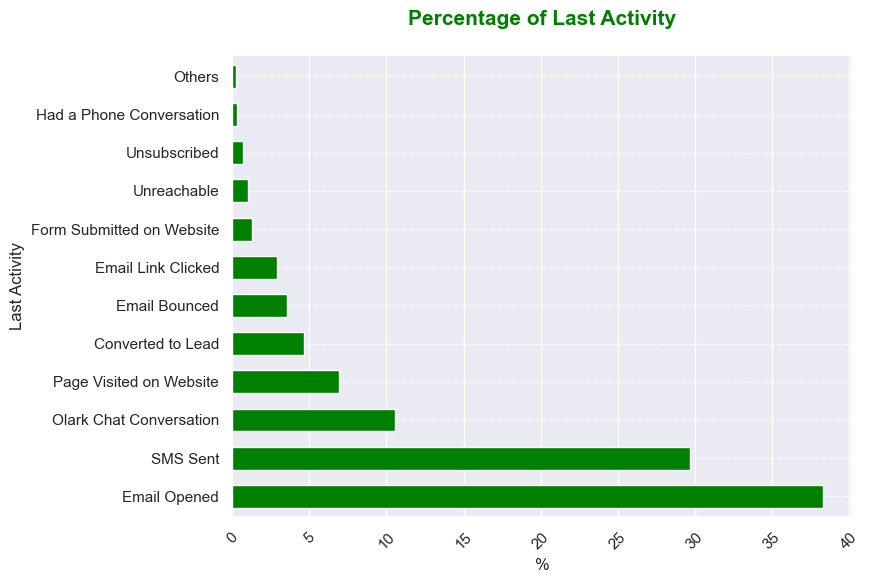

In [136]:
# Sketch out the chart for Last Activity
Last_Activity_percentage = lead["Last Activity"].value_counts(normalize=True) * 100

# Plot the bar chart
Last_Activity_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Last Activity\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Last Activity", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

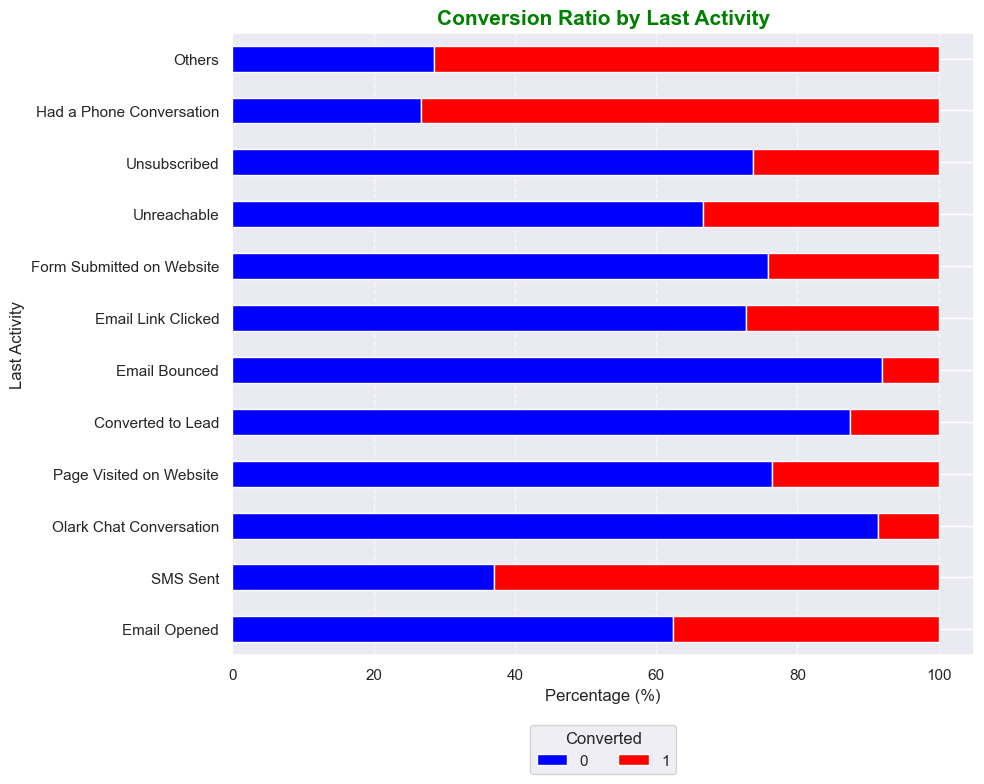

In [137]:
# Compute the ratio of conversion for each Lead Source (normalized to 100%)
stacked_Last_Activity_data = pd.crosstab(lead["Last Activity"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_4 = pd.crosstab(lead["Last Activity"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_Last_Activity_data = stacked_Last_Activity_data.loc[sample_sizes_4.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_Last_Activity_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Last Activity", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Last Activity", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [138]:
print(stacked_Last_Activity_data)

Converted                          0          1
Last Activity                                  
Email Opened               62.316384  37.683616
SMS Sent                   37.085610  62.914390
Olark Chat Conversation    91.366906   8.633094
Page Visited on Website    76.406250  23.593750
Converted to Lead          87.383178  12.616822
Email Bounced              92.024540   7.975460
Email Link Clicked         72.659176  27.340824
Form Submitted on Website  75.862069  24.137931
Unreachable                66.666667  33.333333
Unsubscribed               73.770492  26.229508
Had a Phone Conversation   26.666667  73.333333
Others                     28.571429  71.428571


##### Observations:
- "Email Opened", "SMS Sent" and "Olark Chat Conversion" are the top 3 most common channels that customers interacted lastly.
- Though "Email Opened" got the highest percentage among the top 3 channels, its conversion rate is not as high as the second most popular "SMS Sent".
- Therefore, "SMS Sent" is seen as an important factor to consider.

##### Country

In [139]:
lead["Country"].value_counts()

Country
India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberi

In [140]:
# Since there are many responses having very small data, let's group them all into "Others" to simplify the variable list later on
lead["Country"] = lead["Country"].replace({'Singapore': 'Others', 'Saudi Arabia': 'Others','United Kingdom': 'Others',
                                           'Australia': 'Others', 'Qatar': 'Others', 'Hong Kong': 'Others',
                                           'Bahrain': 'Others', 'Oman': 'Others', 'France': 'Others',
                                        'unknown': 'Unknown', 'Kuwait': 'Others', 'South Africa': 'Others',
                                           'Nigeria': 'Others', 'Germany': 'Others', 'Canada': 'Others',
                                           'Sweden': 'Others', 'Italy': 'Others', 'Belgium': 'Others',
                                           'Ghana': 'Others', 'Philippines': 'Others', 'Netherlands': 'Others',
                                           'China': 'Others', 'Asia/Pacific Region': 'Others', 'Bangladesh': 'Others',
                                           'Uganda': 'Others', 'Russia': 'Others', 'Sri Lanka': 'Others',
                                           'Tanzania': 'Others', 'Kenya': 'Others', 'Malaysia': 'Others',
                                           'Liberia ': 'Others', 'Denmark': 'Others', 'Switzerland': 'Others',
                                           'Vietnam': 'Others', 'Indonesia ': 'Others',
                                          'United States': 'Others', 'United Arab Emirates': 'Others',
                                           'Liberia': 'Others', 'Indonesia': 'Others'
                                          })                          

In [141]:
100*lead["Country"].value_counts(normalize=True).round(2)

Country
India      70.0
Unknown    27.0
Others      3.0
Name: proportion, dtype: float64

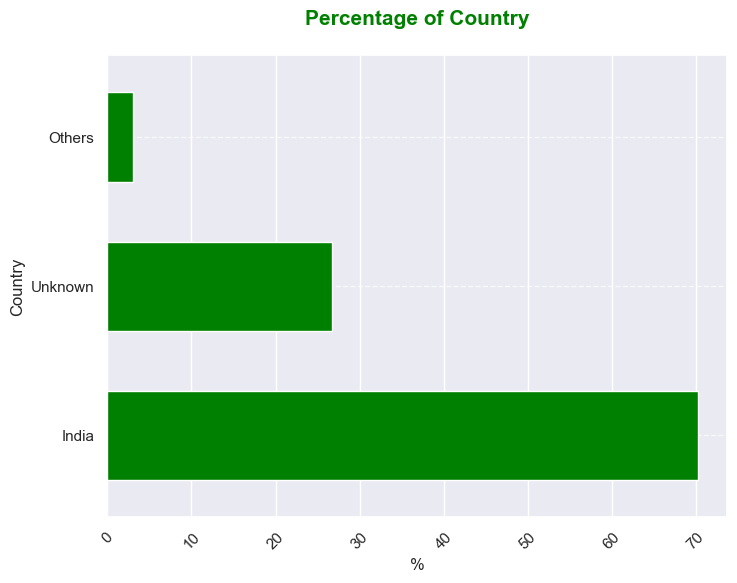

In [142]:
# Sketch out the chart for Country
country_percentage = lead["Country"].value_counts(normalize=True) * 100

# Plot the bar chart
country_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Country\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

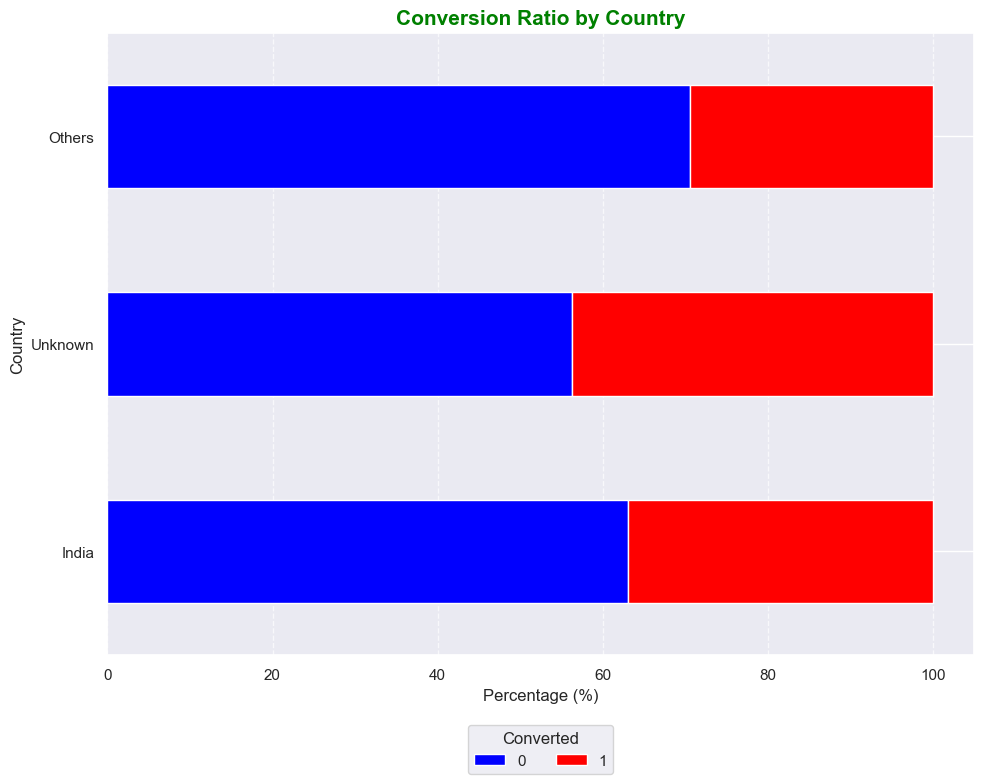

In [143]:
# Compute the ratio of conversion for each Country (normalized to 100%)
stacked_data_country = pd.crosstab(lead["Country"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_5 = pd.crosstab(lead["Country"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_data_country = stacked_data_country.loc[sample_sizes_5.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_data_country.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Country", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### Observations:
- Majority of students are from India (70%), 27% of customers are unknown.
- Meanwhile, the conversion rate among unknown customers are higher than Indian ones.

##### Specialization

In [144]:
lead["Specialization"].value_counts()

Specialization
Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [145]:
100*lead["Specialization"].value_counts(normalize=True).round(2)

Specialization
Unknown                              37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Media and Advertising                 2.0
Travel and Tourism                    2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: proportion, dtype: float64

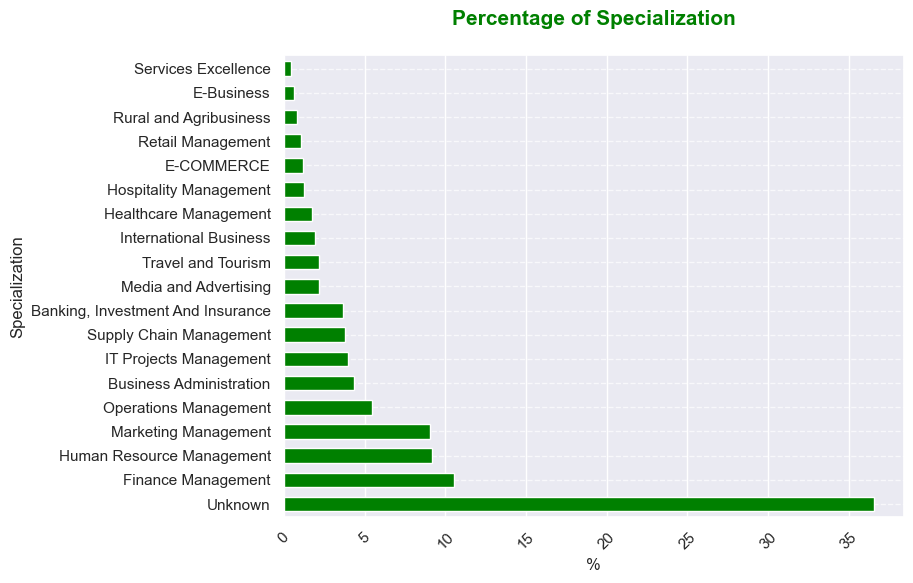

In [146]:
# Sketch out the chart for Specialization
Specialization_percentage = lead["Specialization"].value_counts(normalize=True) * 100

# Plot the bar chart
Specialization_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Specialization\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Specialization", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

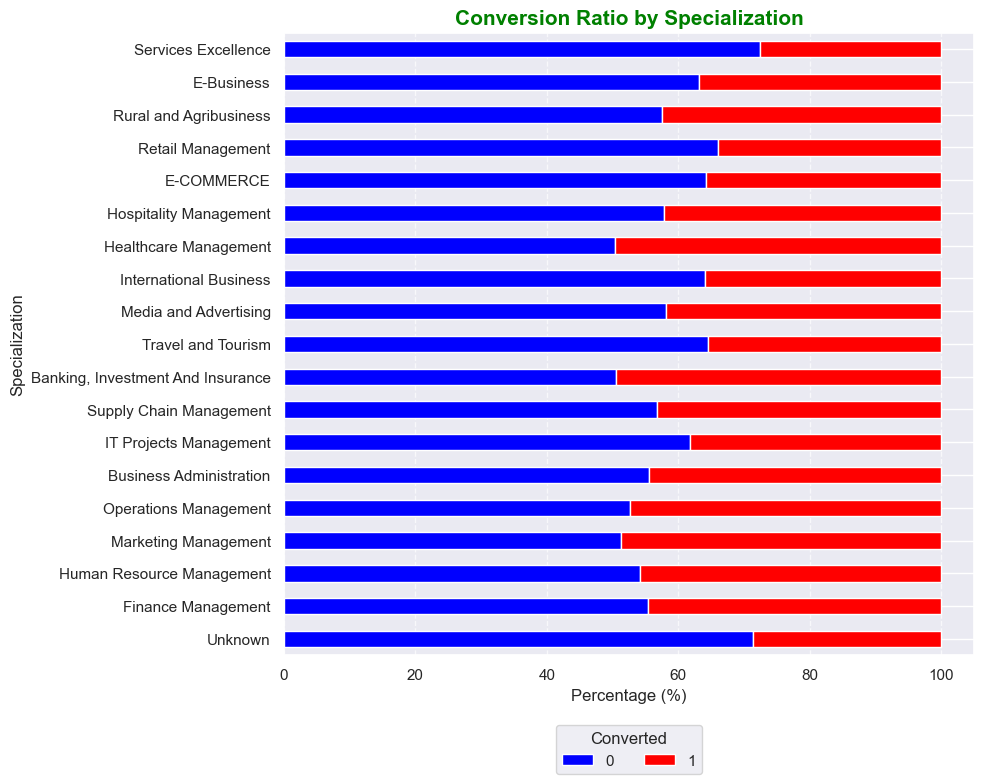

In [147]:
# Compute the ratio of conversion for each Specialization (normalized to 100%)
stacked_data_Specialization = pd.crosstab(lead["Specialization"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_6 = pd.crosstab(lead["Specialization"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_data_Specialization = stacked_data_Specialization.loc[sample_sizes_6.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_data_Specialization.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Specialization", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Specialization", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [148]:
print(stacked_data_Specialization)

Converted                                  0          1
Specialization                                         
Unknown                            71.331361  28.668639
Finance Management                 55.327869  44.672131
Human Resource Management          54.245283  45.754717
Marketing Management               51.312649  48.687351
Operations Management              52.683897  47.316103
Business Administration            55.583127  44.416873
IT Projects Management             61.748634  38.251366
Supply Chain Management            56.733524  43.266476
Banking, Investment And Insurance  50.591716  49.408284
Travel and Tourism                 64.532020  35.467980
Media and Advertising              58.128079  41.871921
International Business             64.044944  35.955056
Healthcare Management              50.314465  49.685535
Hospitality Management             57.894737  42.105263
E-COMMERCE                         64.285714  35.714286
Retail Management                  66.000000  34

##### Observations:
- "Unknown" occupies 37% of data of this column.
- Among known data for this column, customers choose a wide range of specializations from various domains including marketing, finance, HR, operation, etc.
- Among those, top 3 most common specializations are finance management, HR management, Marketing management.

##### How did you hear about X Education

In [149]:
lead["How did you hear about X Education"].value_counts()

How did you hear about X Education
Unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [150]:
lead["How did you hear about X Education"].value_counts(normalize=True).round(2)

How did you hear about X Education
Unknown                  0.78
Online Search            0.09
Word Of Mouth            0.04
Student of SomeSchool    0.03
Other                    0.02
Multiple Sources         0.02
Advertisements           0.01
Social Media             0.01
Email                    0.00
SMS                      0.00
Name: proportion, dtype: float64

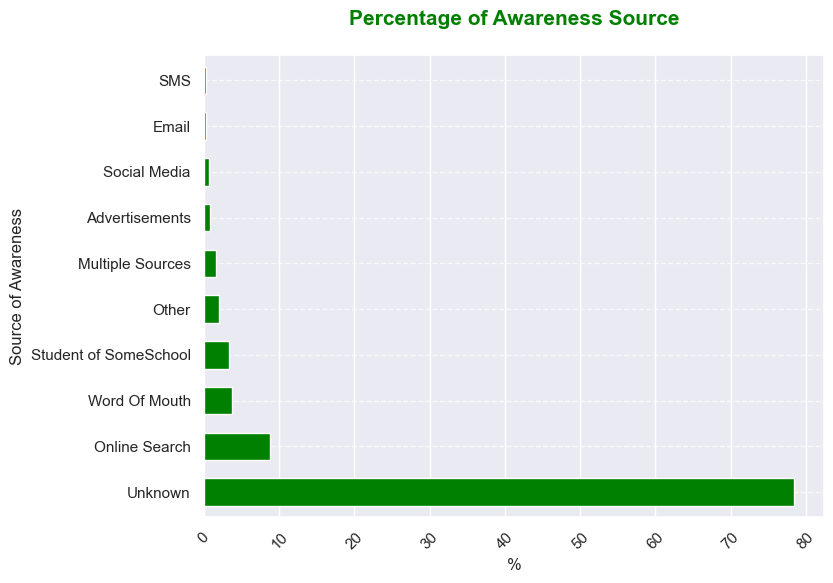

In [151]:
# Sketch out the chart for Lead Source
awareness_source_percentage = lead["How did you hear about X Education"].value_counts(normalize=True) * 100

# Plot the bar chart
awareness_source_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Awareness Source\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Source of Awareness", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

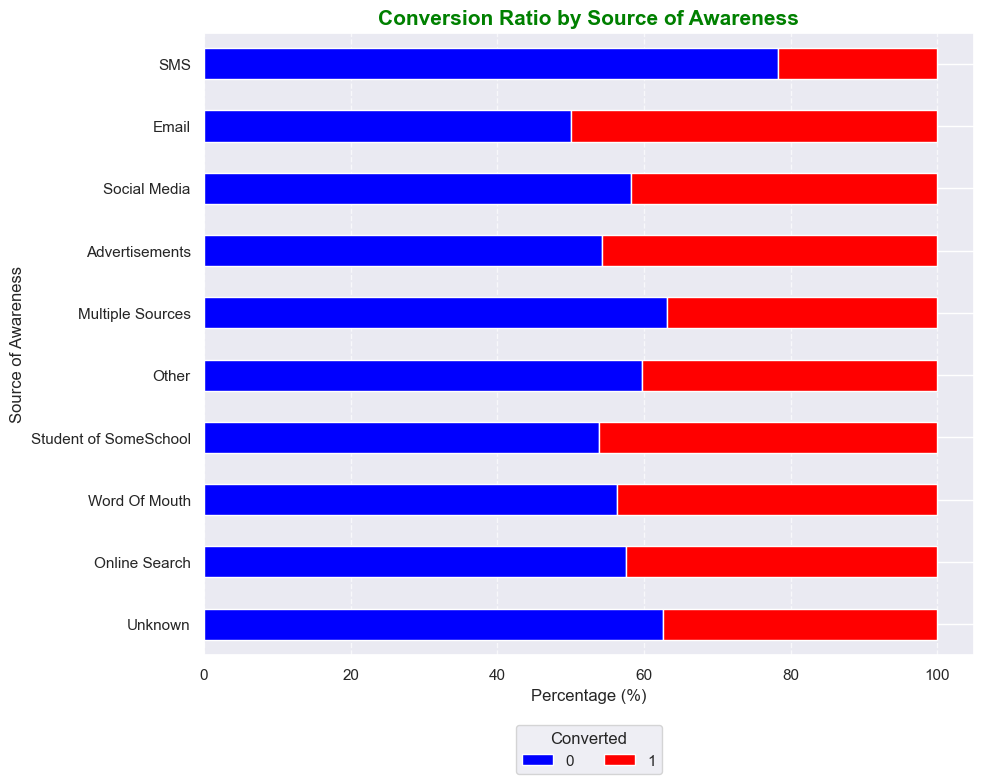

In [152]:
# Compute the ratio of conversion for each Source of Awareness (normalized to 100%)
stacked_awareness_data = pd.crosstab(lead["How did you hear about X Education"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Source of Awareness
sample_sizes_7 = pd.crosstab(lead["How did you hear about X Education"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_awareness_data = stacked_awareness_data.loc[sample_sizes_7.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_awareness_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Source of Awareness", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Source of Awareness", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [153]:
print(stacked_awareness_data)

Converted                                   0          1
How did you hear about X Education                      
Unknown                             62.565517  37.434483
Online Search                       57.549505  42.450495
Word Of Mouth                       56.321839  43.678161
Student of SomeSchool               53.870968  46.129032
Other                               59.677419  40.322581
Multiple Sources                    63.157895  36.842105
Advertisements                      54.285714  45.714286
Social Media                        58.208955  41.791045
Email                               50.000000  50.000000
SMS                                 78.260870  21.739130


##### Observations:
- 78% of students don't provide information about the source of awareness.
- Among provided data, online search and word of mouth are another top 2 common sources of awareness which have quite similar conversion rate.

##### Current Occupation

In [154]:
lead["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [155]:
100*lead["What is your current occupation"].value_counts(normalize=True).round(2)

What is your current occupation
Unemployed              61.0
Unknown                 29.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

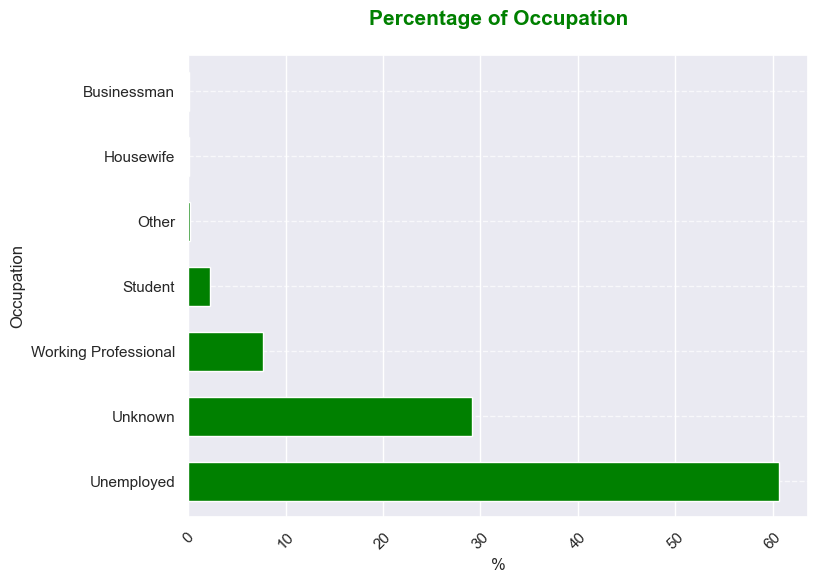

In [156]:
# Sketch out the chart for Occupation
Occupation_percentage = lead["What is your current occupation"].value_counts(normalize=True) * 100

# Plot the bar chart
Occupation_percentage = lead["What is your current occupation"].value_counts(normalize=True) * 100
Occupation_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Occupation\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Occupation", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

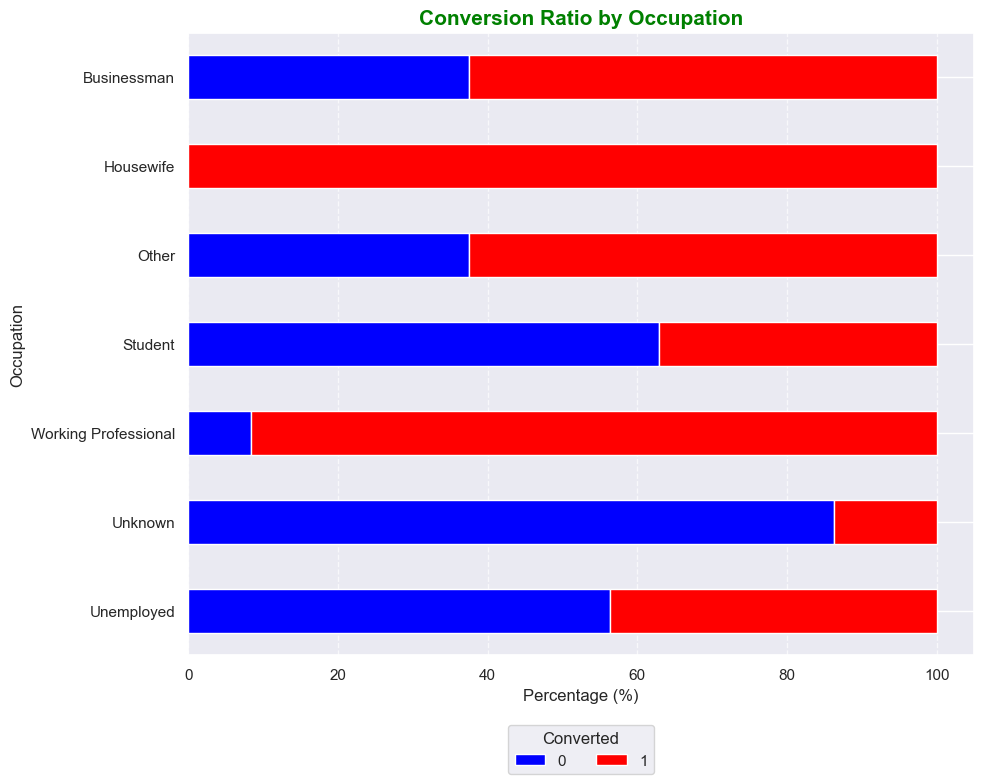

In [157]:
# Compute the ratio of conversion for each occupation (normalized to 100%)
stacked_occupation_data = pd.crosstab(lead["What is your current occupation"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_8 = pd.crosstab(lead["What is your current occupation"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_occupation_data = stacked_occupation_data.loc[sample_sizes_8.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_occupation_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Occupation", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Occupation", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [158]:
print(stacked_occupation_data)

Converted                                0           1
What is your current occupation                       
Unemployed                       56.410714   43.589286
Unknown                          86.245353   13.754647
Working Professional              8.356941   91.643059
Student                          62.857143   37.142857
Other                            37.500000   62.500000
Housewife                         0.000000  100.000000
Businessman                      37.500000   62.500000


##### Observations:
- 61% of students are unemployed, 29% of them dont provide information about current occupation. Meanwhile 8% are working professionals.
- The conversion rate among working professionals is very high (91%). Therefore, working professionals are more potential to focus to convert.

##### What matters most in choosing this course

In [159]:
lead["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Unknown                      2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [160]:
100*lead["What matters most to you in choosing a course"].value_counts(normalize=True).round(2)

What matters most to you in choosing a course
Better Career Prospects      71.0
Unknown                      29.0
Flexibility & Convenience     0.0
Other                         0.0
Name: proportion, dtype: float64

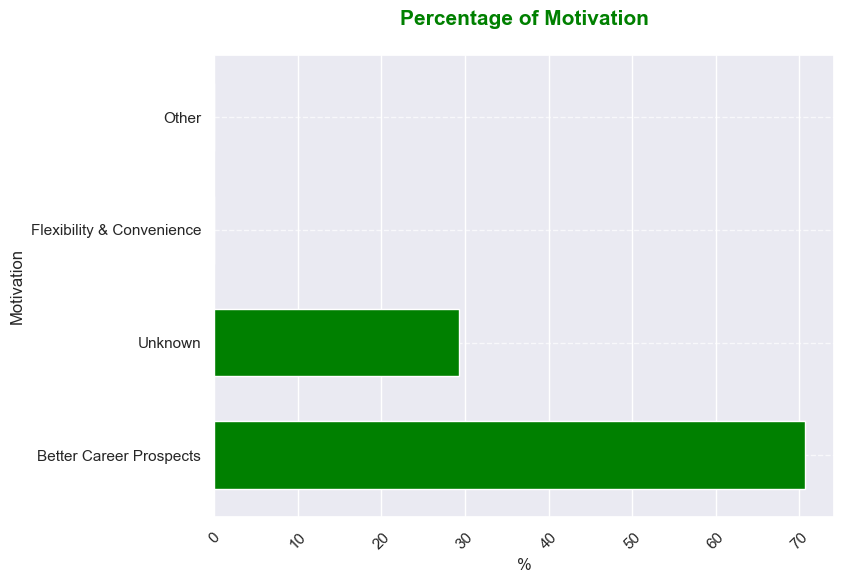

In [161]:
# Sketch out the chart for Occupation
Motivation_percentage = lead["What matters most to you in choosing a course"].value_counts(normalize=True) * 100

# Plot the bar chart
Motivation_percentage = lead["What matters most to you in choosing a course"].value_counts(normalize=True) * 100
Motivation_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Motivation\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Motivation", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

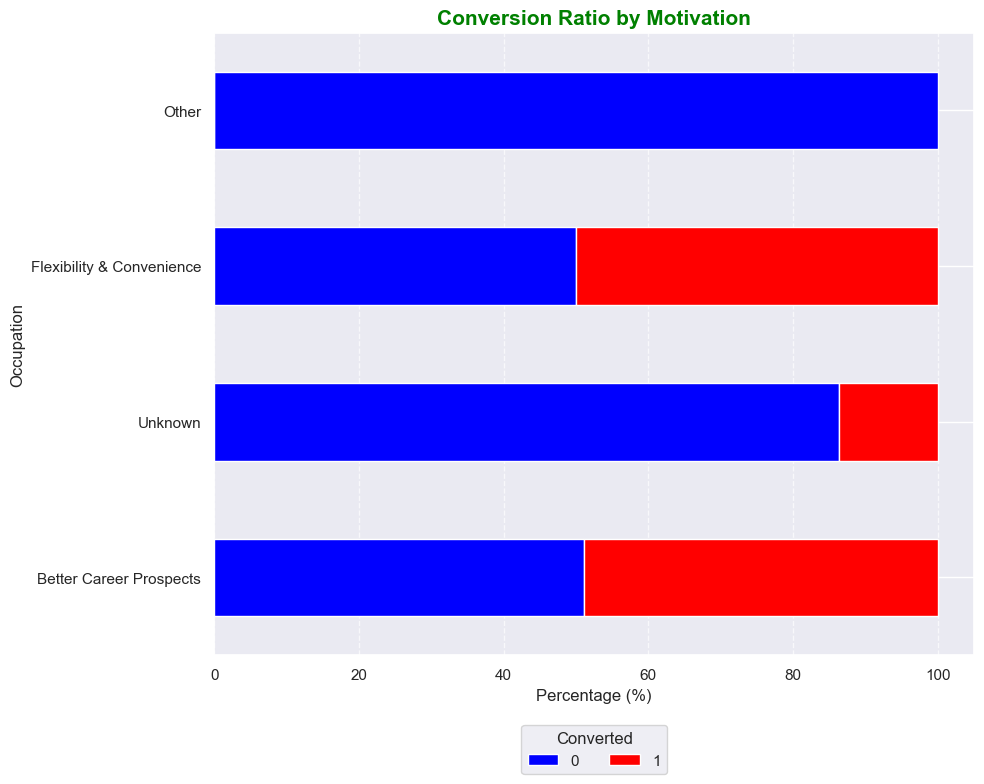

In [162]:
# Compute the ratio of conversion for Motivation (normalized to 100%)
stacked_motivation_data = pd.crosstab(lead["What matters most to you in choosing a course"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_9 = pd.crosstab(lead["What matters most to you in choosing a course"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_motivation_data = stacked_motivation_data.loc[sample_sizes_9.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_motivation_data.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Motivation", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Occupation", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

##### Observation:
- 71% of students choose to study for better career prospect in the future while there are 29% not provide this information.
- The conversion ratio among those who disclosed their study motivation is much higher than among unknown group. Therefore, it can be seen that those who disclose this information show more serious intention to study rather than those who left this information as unknown.

##### Tags

In [163]:
lead["Tags"].value_counts()

Tags
Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [164]:
# Since there are many responses having very small data (sample size <30), let's group them all into "Others" to simplify the variable list later on
lead["Tags"] = lead["Tags"].replace({'number not provided': 'Others', 'in touch with EINS': 'Others','Lost to Others': 'Others',
                                           'Want to take admission but has financial problems': 'Others', 'Still Thinking': 'Others', 'In confusion whether part time or DLP': 'Others',
                                           'Interested in Next batch': 'Others', 'Lateral student': 'Others', 'Shall take in the next coming month': 'Others',
                                          'University not recognized': 'Others', 'Recognition issue (DEC approval)': 'Others'})                          

In [165]:
100*lead["Tags"].value_counts(normalize=True).round(2)

Tags
Unknown                                36.0
Will revert after reading the email    22.0
Ringing                                13.0
Interested in other courses             6.0
Already a student                       5.0
Closed by Horizzon                      4.0
switched off                            3.0
Busy                                    2.0
Lost to EINS                            2.0
Not doing further education             2.0
Interested  in full time MBA            1.0
Graduation in progress                  1.0
invalid number                          1.0
Others                                  1.0
Diploma holder (Not Eligible)           1.0
wrong number given                      1.0
opp hangup                              0.0
Name: proportion, dtype: float64

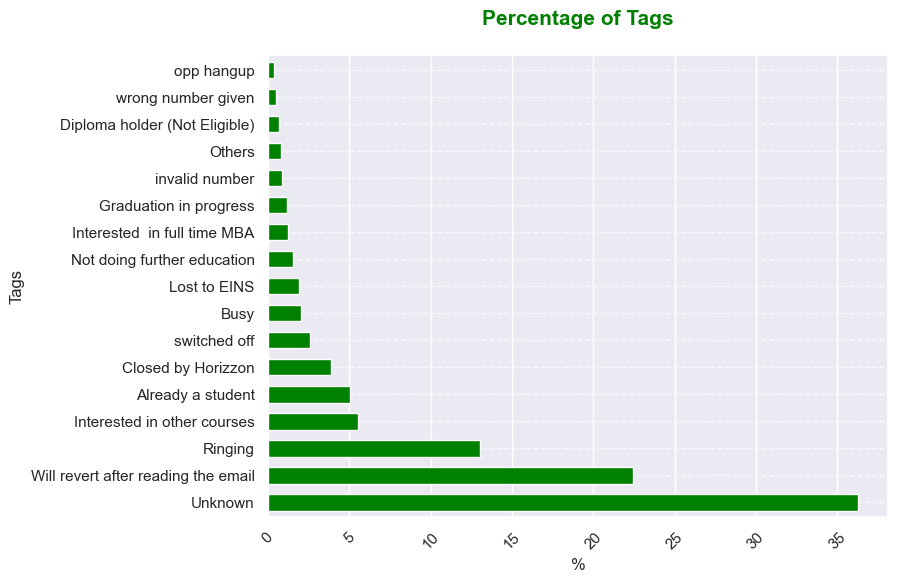

In [166]:
# Sketch out the chart for Tags
tags_percentage = lead["Tags"].value_counts(normalize=True) * 100

# Plot the bar chart
tags_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Tags\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Tags", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

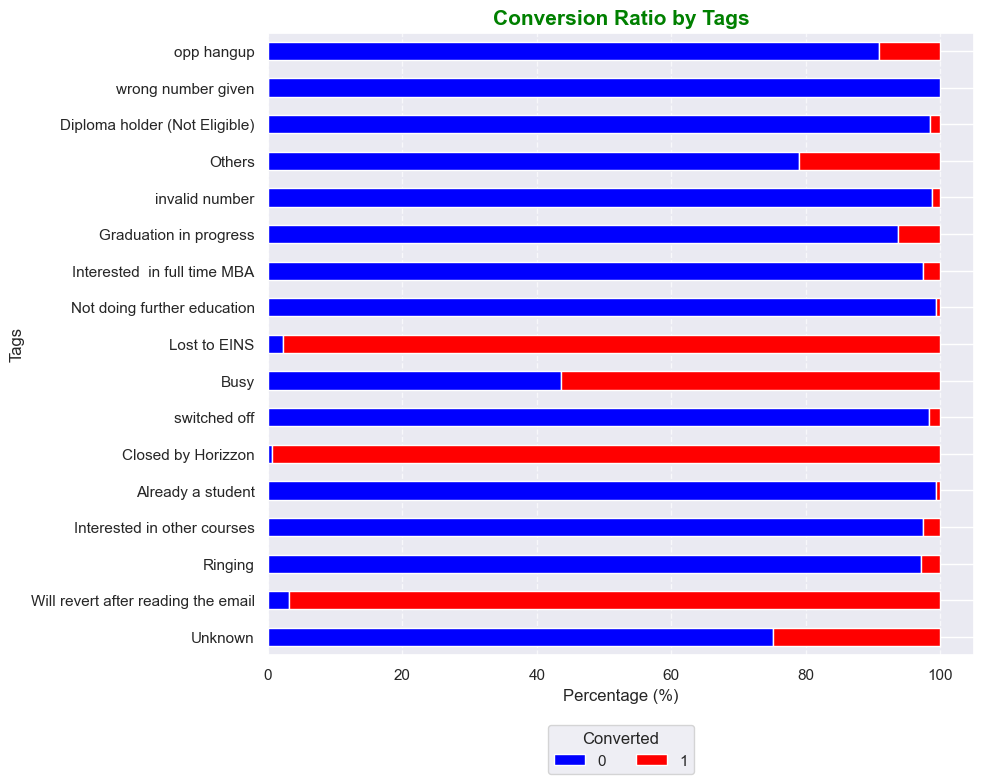

In [167]:
stacked_data_tag = pd.crosstab(lead["Tags"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_10 = pd.crosstab(lead["Tags"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_data_tag = stacked_data_tag.loc[sample_sizes_10.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_data_tag.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Tags", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Tags", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [168]:
print(stacked_data_tag)

Converted                                     0          1
Tags                                                      
Unknown                               75.067104  24.932896
Will revert after reading the email    3.137066  96.862934
Ringing                               97.173732   2.826268
Interested in other courses           97.465887   2.534113
Already a student                     99.354839   0.645161
Closed by Horizzon                     0.558659  99.441341
switched off                          98.333333   1.666667
Busy                                  43.548387  56.451613
Lost to EINS                           2.285714  97.714286
Not doing further education           99.310345   0.689655
Interested  in full time MBA          97.435897   2.564103
Graduation in progress                93.693694   6.306306
invalid number                        98.795181   1.204819
Others                                78.947368  21.052632
Diploma holder (Not Eligible)         98.412698   1.5873

##### Observations:
- 36% of students refused to share this information while 22% are stated as "Will revert after reading the email".
- Also, the conversion rate among those who are at stage of "Will revert after reading the email" is really high (96%). This implies that "Will revert after reading the email" status is also very potential to focus while scanning the customer profile.

##### Lead Profile

In [169]:
lead["Lead Profile"].value_counts()

Lead Profile
Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [170]:
100*lead["Lead Profile"].value_counts(normalize=True).round(2)

Lead Profile
Unknown                        74.0
Potential Lead                 17.0
Other Leads                     5.0
Student of SomeSchool           3.0
Lateral Student                 0.0
Dual Specialization Student     0.0
Name: proportion, dtype: float64

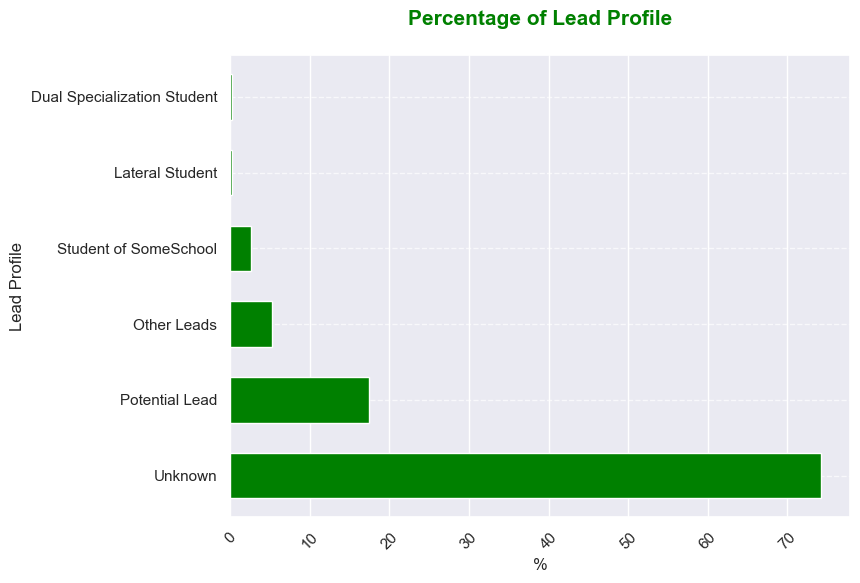

In [171]:
# Sketch out the chart for Profile
Profile_percentage = lead["Lead Profile"].value_counts(normalize=True) * 100

# Plot the bar chart
Profile_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)

# Add and format title
plt.title("Percentage of Lead Profile\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})

# Add labels for axes
plt.xlabel("%", fontsize=12)
plt.ylabel("Lead Profile", fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

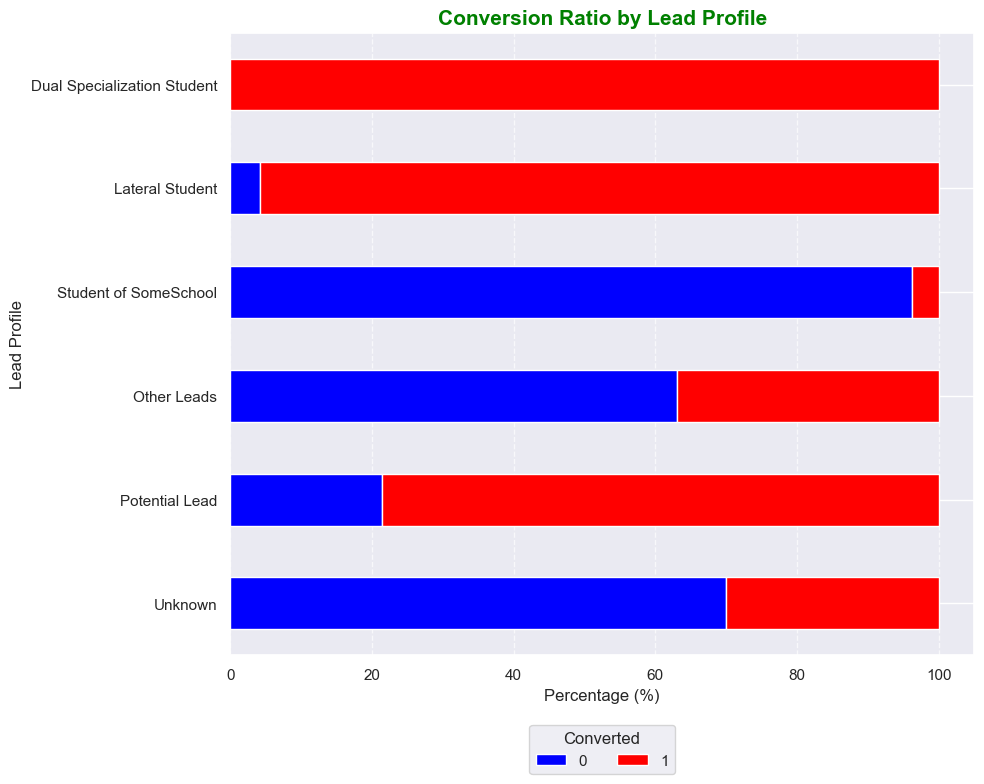

In [172]:
# Compute the ratio of conversion for each Lead Source (normalized to 100%)
stacked_data_Profile = pd.crosstab(lead["Lead Profile"], lead["Converted"], normalize="index") * 100

# Compute the sample size for each Lead Source
sample_sizes_11 = pd.crosstab(lead["Lead Profile"], lead["Converted"]).sum(axis=1)

# Sort the data based on sample size
stacked_data_Profile= stacked_data_Profile.loc[sample_sizes_11.sort_values(ascending=False).index]
# Plot a stacked horizontal bar chart
stacked_data_Profile.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)

# Customize title and axis labels
plt.title("Conversion Ratio by Lead Profile", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Lead Profile", fontsize=12)

# Add a legend and grid
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [173]:
print(stacked_data_Profile)

Converted                            0           1
Lead Profile                                      
Unknown                      69.919767   30.080233
Potential Lead               21.450713   78.549287
Other Leads                  63.039014   36.960986
Student of SomeSchool        96.265560    3.734440
Lateral Student               4.166667   95.833333
Dual Specialization Student   0.000000  100.000000


##### Observations:
- 74% students have no information for this column, and among that only 30% being converted.
- 17% are potential lead with 78% are converted.

##### City

In [174]:
lead["City"].value_counts()

City
Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [175]:
100*lead["City"].value_counts(normalize=True).round(2)

City
Unknown                        40.0
Mumbai                         35.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

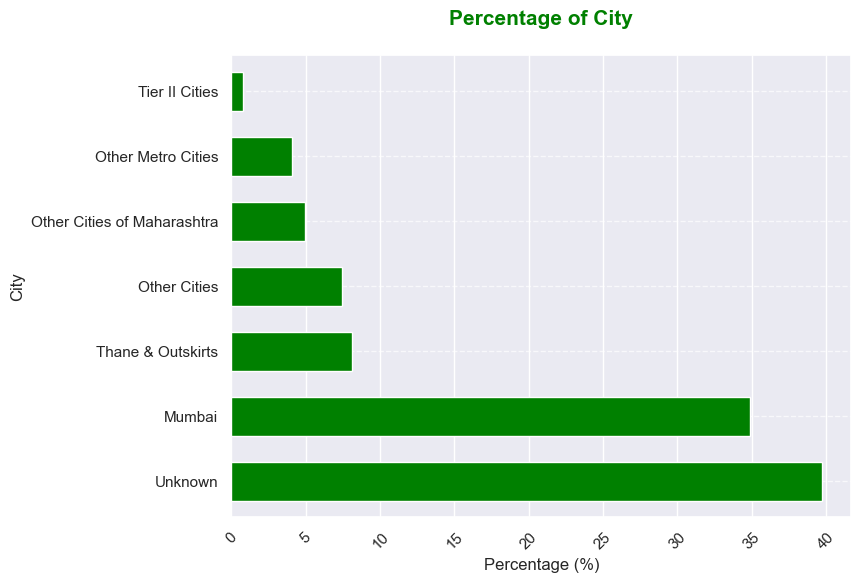

In [176]:
City_percentage = lead["City"].value_counts(normalize=True) * 100
City_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)
plt.title("Percentage of City\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})
plt.ylabel("City", fontsize=12)
plt.xlabel("Percentage (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

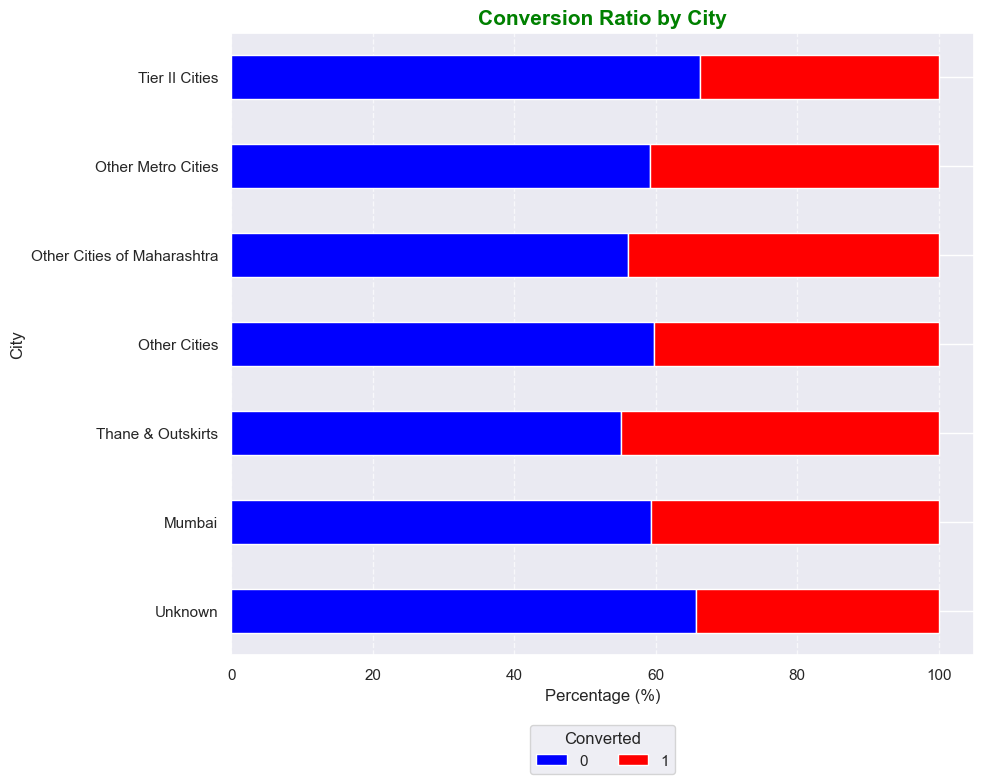

In [177]:
stacked_data_city = pd.crosstab(lead["City"], lead["Converted"], normalize="index") * 100
sample_sizes_12 = pd.crosstab(lead["City"], lead["Converted"]).sum(axis=1)
stacked_data_city = stacked_data_city.loc[sample_sizes_12.sort_values(ascending=False).index]
stacked_data_city.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)
plt.title("Conversion Ratio by City", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [178]:
print(stacked_data_city)

Converted                            0          1
City                                             
Unknown                      65.739984  34.260016
Mumbai                       59.373060  40.626940
Thane & Outskirts            55.053191  44.946809
Other Cities                 59.766764  40.233236
Other Cities of Maharashtra  56.017505  43.982495
Other Metro Cities           59.210526  40.789474
Tier II Cities               66.216216  33.783784


##### Observations:
- 40% of students did not provide information about city.
- 35% are from Mumbai
- There is no significant difference in terms of conversion rate among different cities.

##### Free copy of mastering the interview

In [179]:
lead["A free copy of Mastering The Interview"].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [180]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                          0.0   
1  Organic Search          0          5.0                        674.0   
2  Direct Traffic          1          2.0                       1532.0   
3  Direct Traffic          0          1.0                        305.0   
4          Google          1          2.0                       1428.0   

   Page Views Per Visit            Last Activity  Country  \
0                   0.0  Page Visited on Website  Unknown   
1                   2.5             Email Opened    India   
2                   2.0             Email Opened    India   
3                   1.0              Unreachable    India   
4                   1.0        Converted to Lead    India   

            Specialization How did you hear about X Education  \
0                  Unknown                            Unknown   
1                  Unknown                            Unknown   
2  Business Administration                            Unknown   
3    Media and Advertising                      Word Of Mouth   
4                  Unknown                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Range_Time_Spent_Website Range_Page_View_Per_Visit  
0                     <=60                  <=1 page  
1                     >180                 2-3 pages  
2                     >180                 2-3 pages  
3                     >180                 1-2 pages  
4                     >180                 1-2 pages

In [181]:
100*lead["A free copy of Mastering The Interview"].value_counts(normalize=True).round(2)

A free copy of Mastering The Interview
No     69.0
Yes    31.0
Name: proportion, dtype: float64

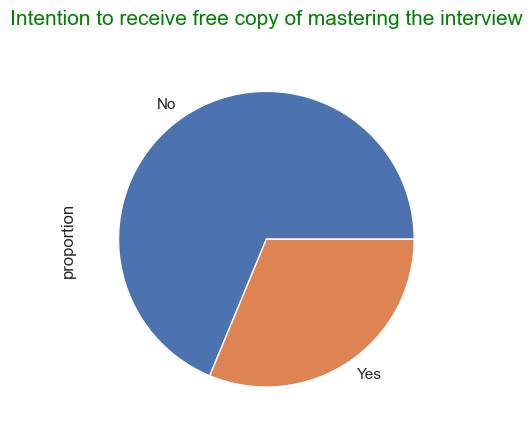

In [182]:
#plot the pie chart of age group
lead["A free copy of Mastering The Interview"].value_counts(normalize=True).plot.pie()
# Adding and formatting title
plt.title("Intention to receive free copy of mastering the interview\n", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

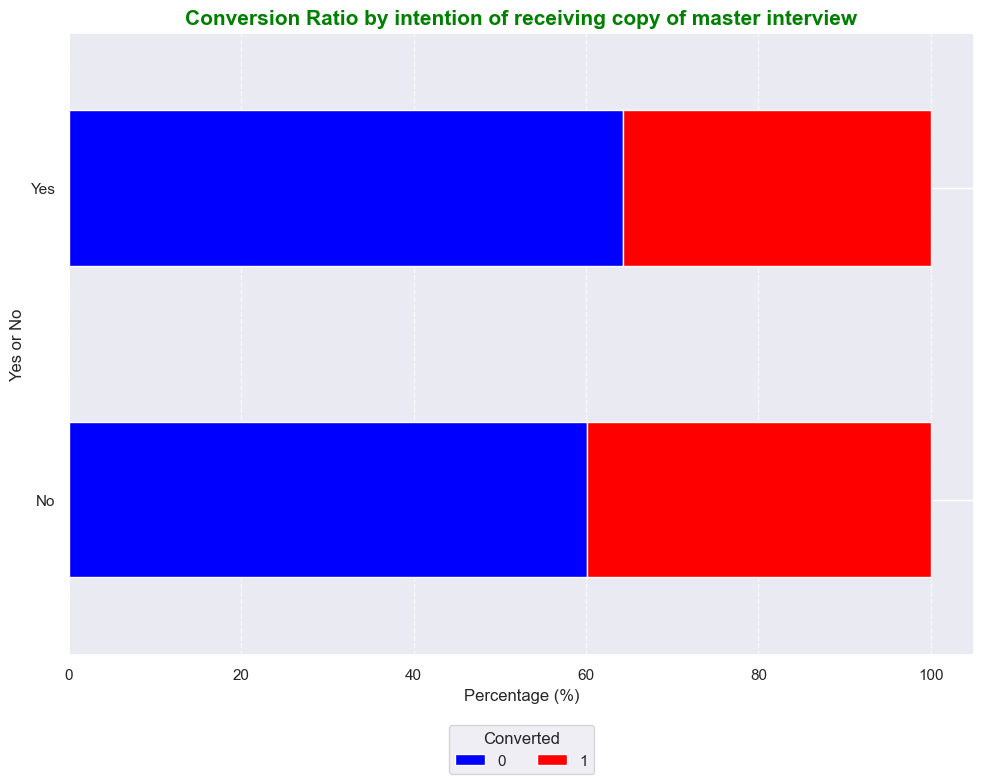

In [183]:
stacked_data_free_copy = pd.crosstab(lead["A free copy of Mastering The Interview"], lead["Converted"], normalize="index") * 100
sample_sizes_13 = pd.crosstab(lead["A free copy of Mastering The Interview"], lead["Converted"]).sum(axis=1)
stacked_data_free_copy = stacked_data_free_copy.loc[sample_sizes_13.sort_values(ascending=False).index]
stacked_data_free_copy.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)
plt.title("Conversion Ratio by intention of receiving copy of master interview", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Yes or No", fontsize=12)
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [184]:
print(stacked_data_free_copy)

Converted                                       0          1
A free copy of Mastering The Interview                      
No                                      60.154282  39.845718
Yes                                     64.335180  35.664820


##### Observations:
- Only 31% of customers would like to receive a free copy of "Mastering the Interview".
- There is no significant difference in terms of conversion rate between those 2 groups.

##### Last Notable activity

In [185]:
lead["Last Notable Activity"].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [186]:
# Since there are many responses having very small data, let's group them all into "Others" to simplify the variable list later on
lead["Last Notable Activity"] = lead["Last Notable Activity"].replace({'Had a Phone Conversation': 'Others',
                                                                       'Email Marked Spam': 'Others',
                                                                       'Approached upfront': 'Others',
                                                                       'Resubscribed to emails': 'Others',
                                                                       'View in browser link Clicked': 'Others',
                                                                       'Form Submitted on Website': 'Others', 'Email Received': 'Others'})                          

In [187]:
100*lead["Last Notable Activity"].value_counts(normalize=True).round(2)

Last Notable Activity
Modified                   37.0
Email Opened               31.0
SMS Sent                   24.0
Page Visited on Website     3.0
Olark Chat Conversation     2.0
Email Link Clicked          2.0
Email Bounced               1.0
Unsubscribed                1.0
Unreachable                 0.0
Others                      0.0
Name: proportion, dtype: float64

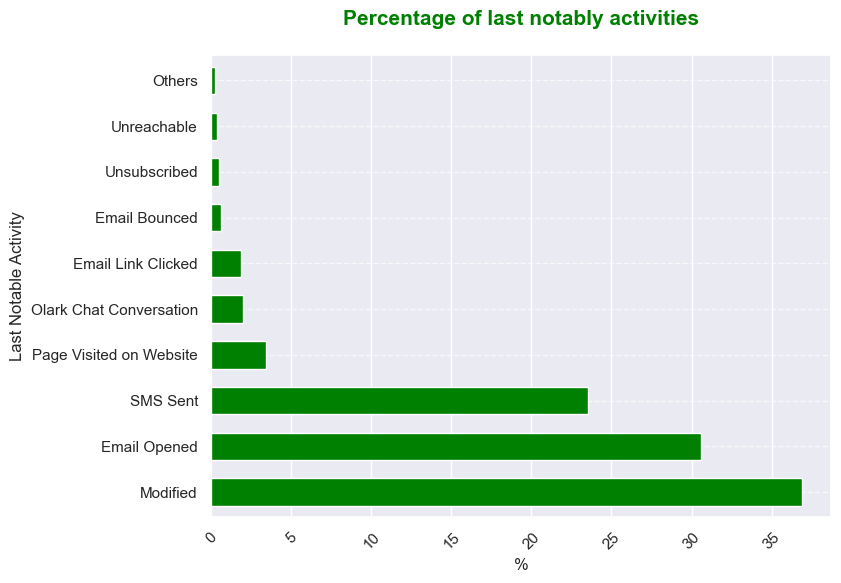

In [188]:
last_notable_activity_percentage = lead["Last Notable Activity"].value_counts(normalize=True) * 100
last_notable_activity_percentage.plot.barh(color='green', figsize=(8, 6), width=0.6)
plt.title("Percentage of last notably activities\n", fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Green'})
plt.xlabel("%", fontsize=12)
plt.ylabel("Last Notable Activity", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

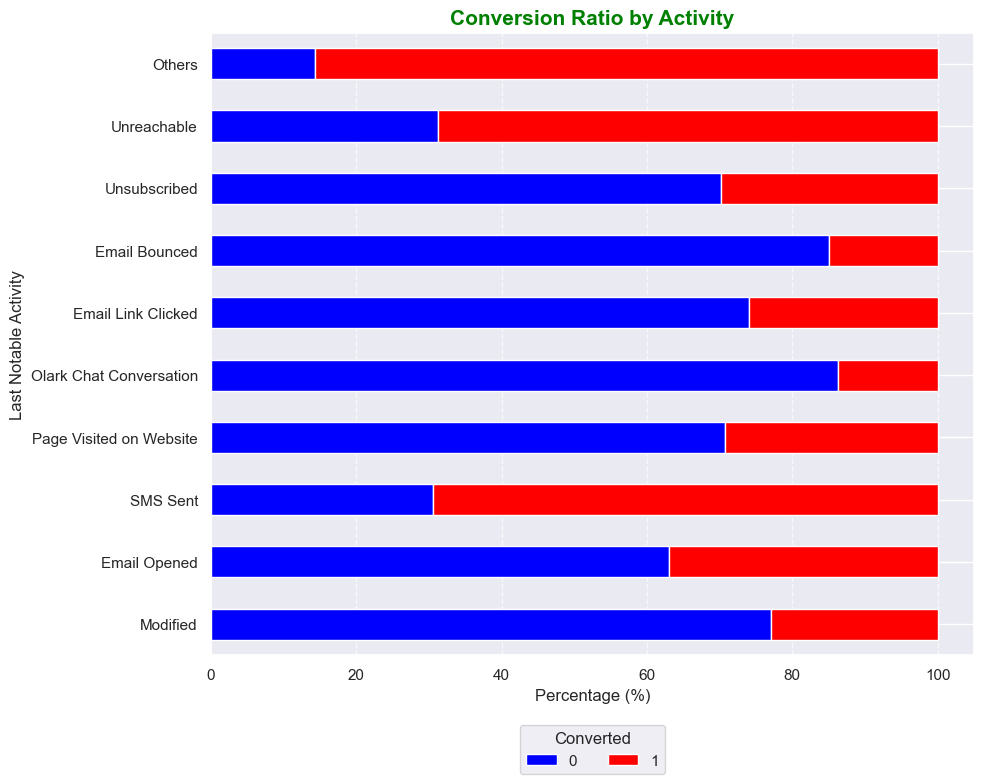

In [189]:
stacked_data_activity = pd.crosstab(lead["Last Notable Activity"], lead["Converted"], normalize="index") * 100
sample_sizes_14 = pd.crosstab(lead["Last Notable Activity"], lead["Converted"]).sum(axis=1)
stacked_data_activity = stacked_data_activity.loc[sample_sizes_14.sort_values(ascending=False).index]
stacked_data_activity.plot(
    kind="barh",        # Horizontal stacked bar chart
    stacked=True,       # Ensure bars are stacked
    figsize=(10, 8),    # Adjust the figure size
    color=["blue", "red"]  # Specify colors for the categories
)
plt.title("Conversion Ratio by Activity", fontsize=15, fontweight="bold", color="Green")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Last Notable Activity", fontsize=12)
plt.legend(title="Converted", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [190]:
print(stacked_data_activity)

Converted                        0          1
Last Notable Activity                        
Modified                 77.017904  22.982096
Email Opened             63.070393  36.929607
SMS Sent                 30.570902  69.429098
Page Visited on Website  70.754717  29.245283
Olark Chat Conversation  86.338798  13.661202
Email Link Clicked       73.988439  26.011561
Email Bounced            85.000000  15.000000
Unsubscribed             70.212766  29.787234
Unreachable              31.250000  68.750000
Others                   14.285714  85.714286


In [191]:
print(stacked_Last_Activity_data)

Converted                          0          1
Last Activity                                  
Email Opened               62.316384  37.683616
SMS Sent                   37.085610  62.914390
Olark Chat Conversation    91.366906   8.633094
Page Visited on Website    76.406250  23.593750
Converted to Lead          87.383178  12.616822
Email Bounced              92.024540   7.975460
Email Link Clicked         72.659176  27.340824
Form Submitted on Website  75.862069  24.137931
Unreachable                66.666667  33.333333
Unsubscribed               73.770492  26.229508
Had a Phone Conversation   26.666667  73.333333
Others                     28.571429  71.428571


##### Observations:
- Top 3 most common last notably activities include "Modified", "Email Opened" and "SMS Sent".
- Among these 3 activities, "SMS Sent" got the highest ratio of conversion rate (63%). This fact is also similar with the finding from `Last Activity`

# Step 5: Feature Engineering & Variable Transformation

In [192]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                          0.0   
1  Organic Search          0          5.0                        674.0   
2  Direct Traffic          1          2.0                       1532.0   
3  Direct Traffic          0          1.0                        305.0   
4          Google          1          2.0                       1428.0   

   Page Views Per Visit            Last Activity  Country  \
0                   0.0  Page Visited on Website  Unknown   
1                   2.5             Email Opened    India   
2                   2.0             Email Opened    India   
3                   1.0              Unreachable    India   
4                   1.0        Converted to Lead    India   

            Specialization How did you hear about X Education  \
0                  Unknown                            Unknown   
1                  Unknown                            Unknown   
2  Business Administration                            Unknown   
3    Media and Advertising                      Word Of Mouth   
4                  Unknown                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Range_Time_Spent_Website Range_Page_View_Per_Visit  
0                     <=60                  <=1 page  
1                     >180                 2-3 pages  
2                     >180                 2-3 pages  
3                     >180                 1-2 pages  
4                     >180                 1-2 pages

In [193]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                              'How did you hear about X Education', 'What is your current occupation',
                             'What matters most to you in choosing a course', 
                             'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 
                             'Last Notable Activity']], drop_first=True).astype(int)

# Adding the results to the master dataframe
lead_2 = pd.concat([lead, dummy1], axis=1)
pd.set_option("display.max_columns",None)

In [194]:
lead_2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                          0.0   
1  Organic Search          0          5.0                        674.0   
2  Direct Traffic          1          2.0                       1532.0   
3  Direct Traffic          0          1.0                        305.0   
4          Google          1          2.0                       1428.0   

   Page Views Per Visit            Last Activity  Country  \
0                   0.0  Page Visited on Website  Unknown   
1                   2.5             Email Opened    India   
2                   2.0             Email Opened    India   
3                   1.0              Unreachable    India   
4                   1.0        Converted to Lead    India   

            Specialization How did you hear about X Education  \
0                  Unknown                            Unknown   
1                  Unknown                            Unknown   
2  Business Administration                            Unknown   
3    Media and Advertising                      Word Of Mouth   
4                  Unknown                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile     City  \
0          Interested in other courses         Unknown  Unknown   
1                              Ringing         Unknown  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing         Unknown   Mumbai   
4  Will revert after reading the email         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

  Range_Time_Spent_Website Range_Page_View_Per_Visit  \
0                     <=60                  <=1 page   
1                     >180                 2-3 pages   
2                     >180                 2-3 pages   
3                     >180                 1-2 pages   
4                     >180                 1-2 pages   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2               

In [195]:
dummy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 98 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Origin_Landing Page Submission                                      9240 non-null   int64
 1   Lead Origin_Lead Add Form                                                9240 non-null   int64
 2   Lead Origin_Lead Import                                                  9240 non-null   int64
 3   Lead Origin_Quick Add Form                                               9240 non-null   int64
 4   Lead Source_Facebook                                                     9240 non-null   int64
 5   Lead Source_Google                                                       9240 non-null   int64
 6   Lead Source_Olark Chat                                                   9240 non-null  

In [196]:
dummy1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_U

In [197]:
# To drop "Prospect ID", "Lead Number", and those categories that being applied dummies
lead_2 = lead_2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                              'How did you hear about X Education', 'What is your current occupation',
                             'What matters most to you in choosing a course', 
                             'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 
                             'Last Notable Activity', 'Prospect ID', 'Lead Number', 'Range_Time_Spent_Website',
                      'Range_Page_View_Per_Visit'], axis = 1)
lead_2.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                          0.0                   0.0   
1          0          5.0                        674.0                   2.5   
2          1          2.0                       1532.0                   2.0   
3          0          1.0                        305.0                   1.0   
4          1          2.0                       1428.0                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0

In [198]:
pd.set_option('display.max_rows', None)
lead_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 102 entries, Converted to Last Notable Activity_Unsubscribed
dtypes: float64(3), int64(99)
memory usage: 7.2 MB


In [199]:
lead_2.isnull().sum()

Converted                                                                    0
TotalVisits                                                                137
Total Time Spent on Website                                                  0
Page Views Per Visit                                                       137
Lead Origin_Landing Page Submission                                          0
Lead Origin_Lead Add Form                                                    0
Lead Origin_Lead Import                                                      0
Lead Origin_Quick Add Form                                                   0
Lead Source_Facebook                                                         0
Lead Source_Google                                                           0
Lead Source_Olark Chat                                                       0
Lead Source_Organic Search                                                   0
Lead Source_Others                                  

In [200]:
# Only "TotalVisits" and "Pages Per Visit" have 137 missing values. We can remove these rows
lead_2=lead_2.dropna()

In [201]:
lead_2.isnull().sum()

Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Lead Origin_Landing Page Submission                                        0
Lead Origin_Lead Add Form                                                  0
Lead Origin_Lead Import                                                    0
Lead Origin_Quick Add Form                                                 0
Lead Source_Facebook                                                       0
Lead Source_Google                                                         0
Lead Source_Olark Chat                                                     0
Lead Source_Organic Search                                                 0
Lead Source_Others                                                         0

In [202]:
lead_2.shape

(9103, 102)

# Step 6: Train_Test_Split

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
# Putting feature variable to X
X = lead_2.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   Last Activity_Page Visited on Websit

In [205]:
# Putting response variable to y
y = lead_2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [206]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Feature Scaling

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7962    -0.079783                     1.476324             -0.423364   
5520     1.299804                    -0.771066              2.083179   
1962     0.610010                    -0.571257              0.133646   
1566     2.679391                     1.393834              0.690655   
9170    -1.114473                    -0.881052             -1.258878   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7962                                    1                          0   
5520                                    1                          0   
1962                                    1                          0   
1566                                    1                          0   
9170                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
7962                        0                           0   
5520                        0                           0   
1962                        0                           0   
1566                        0                           0   
9170                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
7962                     0                   1                       0   
5520                     0                   0                       0   
1962                     0                   1                       0   
1566                     0                   1                       0   
9170                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
7962                           0                   0                      0   
5520                           0                   0                      0   
1962                           0                   0                      0   
1566                           0                   0                      0   
9170                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
7962                           0                             0   
5520                           0                             0   
1962                           0                             0   
1566                           0                             0   
9170                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
7962                            0                                 0   
5520                            0                                 0   
1962                            0                                 0   
1566                            0                                 0   
9170                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
7962                           0                                        0   
5520                           1                                        0   
1962                           0                                        0   
1566                           1                                        0   
9170                           1                                        0   

      Last Activity_Had a Phone Conversation  \
7962                                       0   
5520                                       0   
1962                                       0   
1566                                       0   
9170                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7962                                      0                     0   
5520                                      0                     0   
1962                                      0                     0   
1

In [209]:
### Checking the Converted Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.53896103896104

# Step 7: Building Models

##### Looking at Correlations

In [210]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

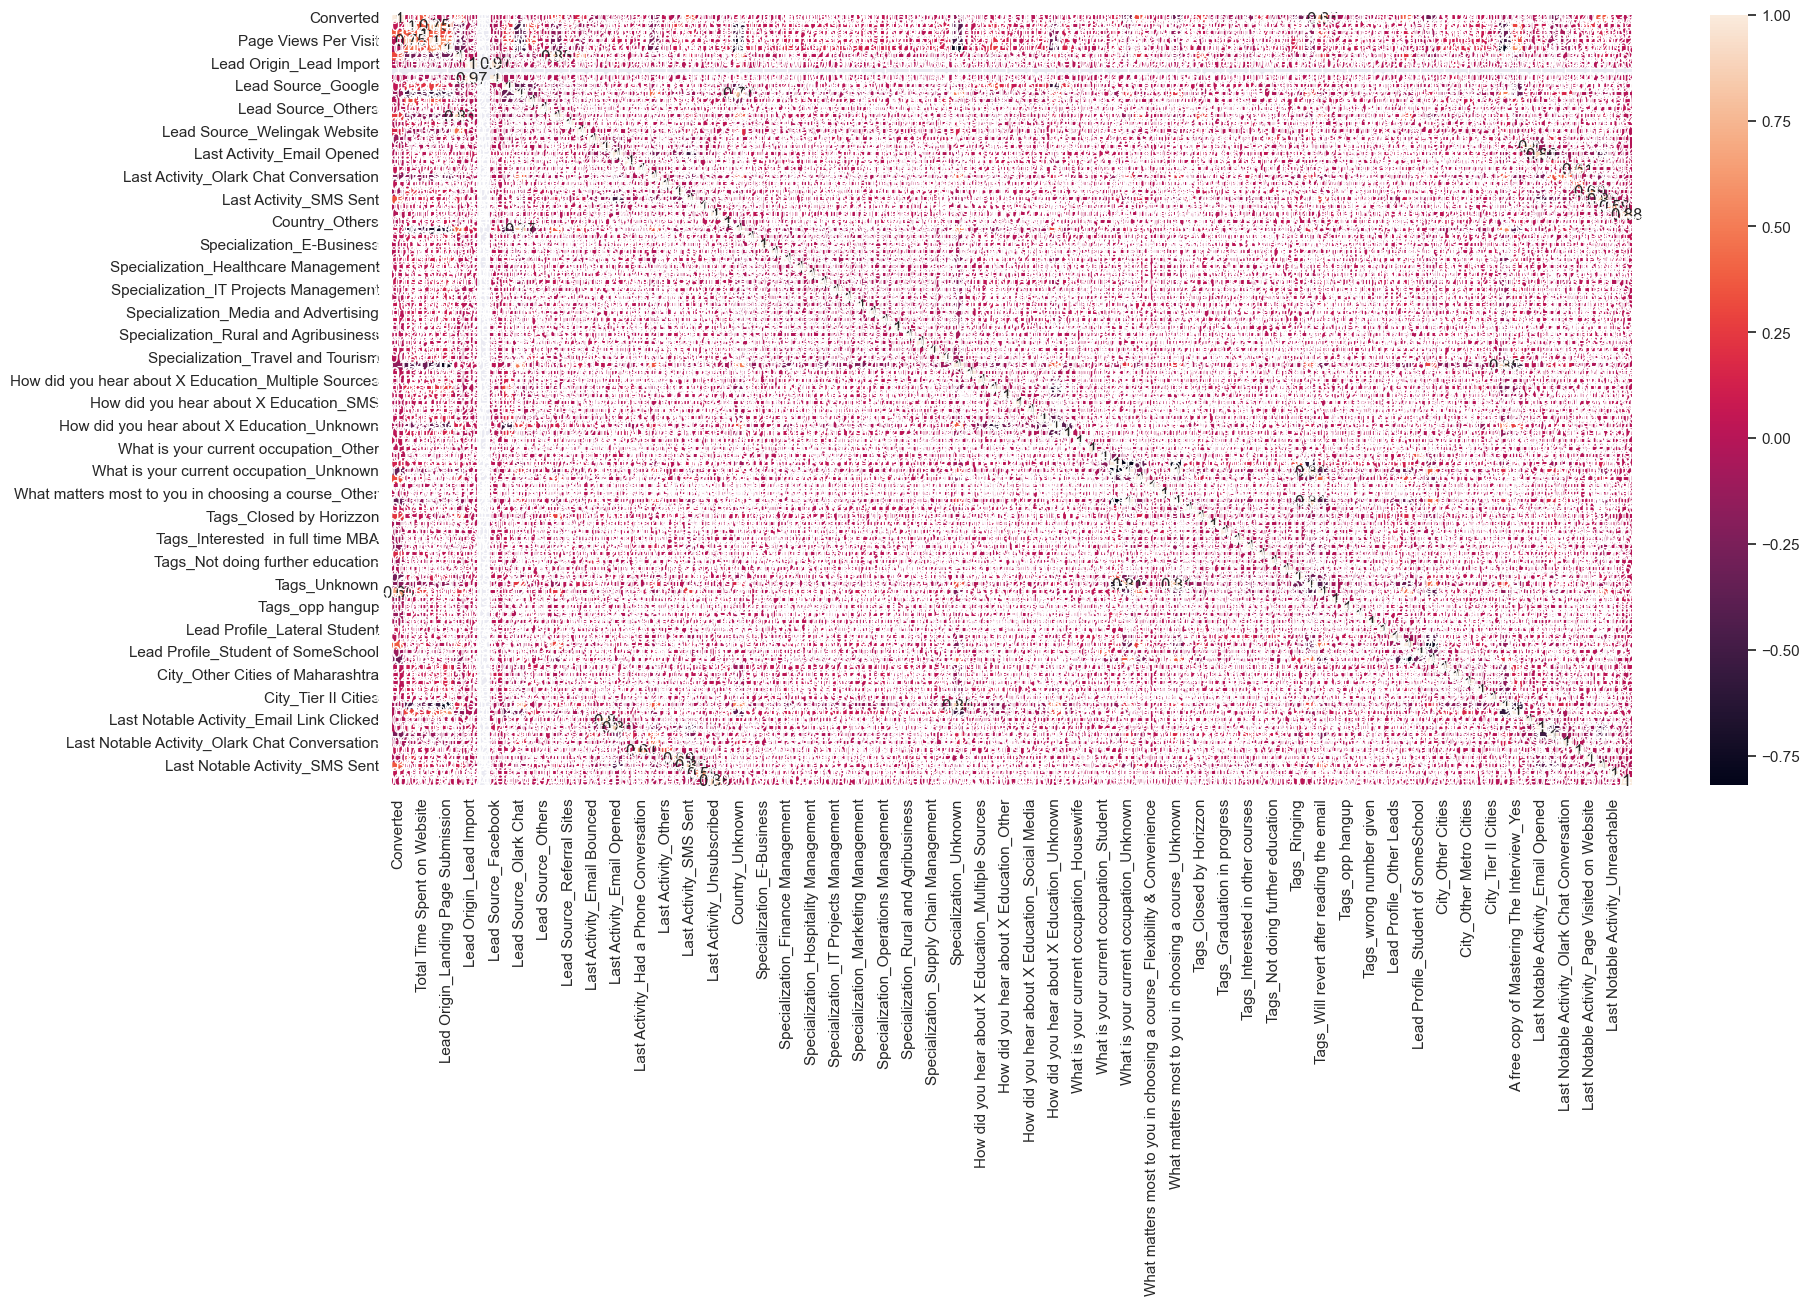

In [211]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_2.corr(),annot = True)
plt.show()

In [212]:
lead_2.corr().round(2)

Converted  TotalVisits  \
Converted                                                1.00         0.05   
TotalVisits                                              0.05         1.00   
Total Time Spent on Website                              0.35         0.36   
Page Views Per Visit                                    -0.00         0.75   
Lead Origin_Landing Page Submission                     -0.04         0.45   
Lead Origin_Lead Add Form                                0.31        -0.28   
Lead Origin_Lead Import                                 -0.01        -0.06   
Lead Origin_Quick Add Form                                NaN          NaN   
Lead Source_Facebook                                    -0.01        -0.06   
Lead Source_Google                                       0.03         0.20   
Lead Source_Olark Chat                                  -0.13        -0.49   
Lead Source_Organic Search                              -0.00         0.30   
Lead Source_Others                                      -0.01         0.01   
Lead Source_Reference                                    0.25        -0.23   
Lead Source_Referral Sites                              -0.03         0.09   
Lead Source_Welingak Website                             0.15        -0.13   
Last Activity_Email Bounced                             -0.13        -0.07   
Last Activity_Email Link Clicked                        -0.04        -0.03   
Last Activity_Email Opened                              -0.03         0.06   
Last Activity_Form Submitted on Website                 -0.03         0.02   
Last Activity_Had a Phone Conversation                   0.05         0.03   
Last Activity_Olark Chat Conversation                   -0.21        -0.21   
Last Activity_Others                                     0.02         0.01   
Last Activity_Page Visited on Website                   -0.08         0.23   
Last Activity_SMS Sent                                   0.34         0.02   
Last Activity_Unreachable                               -0.01         0.03   
Last Activity_Unsubscribed                              -0.02         0.01   
Country_Others                                          -0.03         0.04   
Country_Unknown                                          0.05        -0.61   
Specialization_Business Administration                   0.03         0.07   
Specialization_E-Business                               -0.00         0.03   
Specialization_E-COMMERCE                               -0.01         0.04   
Specialization_Finance Management                        0.04         0.09   
Specialization_Healthcare Management                     0.03         0.05   
Specialization_Hospitality Management                    0.01         0.03   
Specialization_Human Resource Management                 0.05         0.09   
Specialization_IT Projects Management                    0.00         0.05   
Specialization_International Business                   -0.01         0.06   
Specialization_Marketing Management                      0.07         0.05   
Specialization_Media and Advertising                     0.01         0.07   
Specialization_Operations Management                     0.04         0.05   
Specialization_Retail Management                        -0.01         0.05   
Specialization_Rural and Agribusiness                    0.01         0.04   
Specialization_Services Excellence                      -0.01         0.03   
Specialization_Supply Chain Management                   0.02         0.06   
Specialization_Travel and Tourism                       -0.01         0.10   
Specialization_Unknown                                  -0.16        -0.40   
How did you hear about X Education_Email                 0.01         0.02   
How did you hear about X Education_Multiple Sou...      -0.00         0.05   
How did you hear about X Education_Online Search         0.03         0.18   
How did you hear about X Education_Other                 0.01         0.08

##### Observation
Based on correlation matrix, we can see that the top variables contributing positively to `Converted` are:
- `Tags_Will revert after reading the email`	(0.65)
- `Total Time Spent on Website` (0.35)
- `Lead Origin_Lead Add Form`	(0.31)
- `Last Notable Activity_SMS Sent` (0.36)
- `Lead Source_Reference`	(0.25)
- `Lead Profile_Potential Lead`	(0.38)
- `Tags_Closed by Horizzon`	(0.23)	

Meanwhile, below factors seem to impact negatively the conversion rate:
- `Last Notable Activity_Modified`	(-0.26)
- `Lead Profile_Unknown`	(-0.29)
- `Tags_Ringing`	(-0.28)
- `What matters most to you in choosing a course_Unknown`	(-0.33)

### Building the first model

In [213]:
import statsmodels.api as sm

In [214]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                          100
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1013.2
Date:                Mon, 27 Jan 2025   Deviance:                       2026.4
Time:                        07:23:05   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6357
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      15.8012   2.92e+04      0.001      1.000   -5.73e+04    5.73e+04
TotalVisits                                                                 0.4096      0.097      4.235      0.000       0.220       0.599
Total Time Spent on Website                                                 1.0904      0.071     15.441      0.000       0.952       1.229
Page Views Per Visit                                                       -0.3813      0.111     -3.429      0.001      -0.599      -0.163
Lead Origin_Landing Page Submission                                        -0.2330      0.307     -0.759      0.448      -0.834       0.369
Lead Origin_Lead Add Form                                                  -0.1332      1.097     -0.121      0.903      -2.283       2.016
Lead Origin_Lead Import                                                     1.2430      1.937      0.642      0.521      -2.554       5.040
Lead Origin_Quick Add Form                                               1.851e-10   7.08e-07      0.000      1.000   -1.39e-06    1.39e-06
Lead Source_Facebook                                                       -2.0048      1.926     -1.041      0.298      -5.779       1.769
Lead Source_Google                                                          0.0477      0.222      0.215      0.830      -0.387       0.483
Lead Source_Olark Chat                                                     -0.2297      0.454     -0.506      0.613      -1.119       0.660
Lead Source_Organic Search                                                  0.0345      0.231      0.149      0.881      -0.417       0.486
Lead Source_Others                                                          0.4604      1.053      0.437      0.662      -1.603       2.524
Lead Source_Reference                                                      -0.0804      1.167     -0.069      0.945      -2.367       2.206
Lead Source_Referral Sites                                                  0.0907      0.573      0.158      0.874      -1.033       1.215
Lead Source_Welingak Website                                                2.3486      1.290      1.820      0.069      -0.180       4.877
Last Activity_Email Bounced                                                -1.3405      0.750     -1.787      0.074      -2.811       0.130
Last Activity_Email Link Clicked                                            1.3275      0.732      1.813      0.070      -0.108       2.763
Last Activity_Email Opened                                                  0.8736      0.469      1.863      0.063      -0.046       1.793
Las

In [215]:
# Check dtype of all columns to ensure all column data in int format
print(X_train.dtypes)
print(y_train.dtypes)

TotalVisits                                                                float64
Total Time Spent on Website                                                float64
Page Views Per Visit                                                       float64
Lead Origin_Landing Page Submission                                          int64
Lead Origin_Lead Add Form                                                    int64
Lead Origin_Lead Import                                                      int64
Lead Origin_Quick Add Form                                                   int64
Lead Source_Facebook                                                         int64
Lead Source_Google                                                           int64
Lead Source_Olark Chat                                                       int64
Lead Source_Organic Search                                                   int64
Lead Source_Others                                                           int64
Lead

### Feature Selection Using RFE

In [216]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [217]:
from sklearn.feature_selection import RFE

# Initialize RFE with logistic regression and desired number of features
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit RFE on training data
rfe = rfe.fit(X_train, y_train)

In [218]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False])

In [219]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.False_, np.int64(23)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(24)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(28)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(76)),
 ('Lead Origin_Quick Add Form', np.False_, np.int64(82)),
 ('Lead Source_Facebook', np.False_, np.int64(14)),
 ('Lead Source_Google', np.False_, np.int64(62)),
 ('Lead Source_Olark Chat', np.False_, np.int64(73)),
 ('Lead Source_Organic Search', np.False_, np.int64(68)),
 ('Lead Source_Others', np.False_, np.int64(59)),
 ('Lead Source_Reference', np.False_, np.int64(42)),
 ('Lead Source_Referral Sites', np.False_, np.int64(67)),
 ('Lead Source_Welingak Website', np.True_, np.int64(1)),
 ('Last Activity_Email Bounced', np.True_, np.int64(1)),
 ('Last Activity_Email Link Clicked', np.False_, np.int64(21)),
 ('Last Activity_Email Opened', np.False_, np.int64(22)),
 

In [220]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_Unknown',
       'What matters most to you in choosing a course_Unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Assessing the model with StatsModels

In [221]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1069.1
Date:                Mon, 27 Jan 2025   Deviance:                       2138.1
Time:                        07:23:09   Pearson chi2:                 1.05e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6292
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -3.3493      0.215    -15.601      0.000      -3.770      -2.929
Total Time Spent on Website                               1.0758      0.067     16.160      0.000       0.945       1.206
Lead Origin_Lead Add Form                                 0.5114      0.444      1.151      0.250      -0.360       1.382
Lead Source_Welingak Website                              2.0758      0.856      2.424      0.015       0.397       3.754
Last Activity_Email Bounced                              -1.3356      0.434     -3.080      0.002      -2.185      -0.486
Last Activity_SMS Sent                                    2.0398      0.133     15.340      0.000       1.779       2.300
Country_Unknown                                           1.0230      0.165      6.185      0.000       0.699       1.347
What matters most to you in choosing a course_Unknown    -2.7733      0.162    -17.143      0.000      -3.090      -2.456
Tags_Busy                                                 2.1108      0.304      6.954      0.000       1.516       2.706
Tags_Closed by Horizzon                                   8.4421      0.762     11.073      0.000       6.948       9.936
Tags_Lost to EINS                                         9.8144      0.801     12.260      0.000       8.245      11.383
Tags_Not doing further education                         -1.1746      1.037     -1.133      0.257      -3.207       0.858
Tags_Ringing                                             -1.7996      0.312     -5.771      0.000      -2.411      -1.188
Tags_Unknown                                              3.6557      0.240     15.223      0.000       3.185       4.126
Tags_Will revert after reading the email                  6.3031      0.268     23.542      0.000       5.778       6.828
Tags_invalid number                                      -1.7515      1.059     -1.654      0.098      -3.827       0.324
Tags_switched off                                        -2.0733      0.638     -3.252      0.001      -3.323      -0.824
Tags_wrong number given                                 -21.5426    1.2e+04     -0.002      0.999   -2.36e+04    2.36e+04
Lead Profile_Student of SomeSchool                       -2.1440      0.860     -2.494      0.013      -3.829      -0.459
Last Notable Activity_Modified                           -1.4486      0.135    -10.703      0.000      -1.714      -1.183
Last Notable Activity_Olark Chat Conversation            -1.7432      0.453     -3.849      0.000      -2.631      -0.856
=========================================================================================================================
"""

In [222]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [223]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                                       Tags_Unknown  5.34
6   What matters most to you in choosing a course_...  4.76
5                                     Country_Unknown  2.16
1                           Lead Origin_Lead Add Form  1.99
4                              Last Activity_SMS Sent  1.71
13           Tags_Will revert after reading the email  1.67
18                     Last Notable Activity_Modified  1.56
0                         Total Time Spent on Website  1.50
2                        Lead Source_Welingak Website  1.44
8                             Tags_Closed by Horizzon  1.23
11                                       Tags_Ringing  1.14
3                         Last Activity_Email Bounced  1.12
9                                   Tags_Lost to EINS  1.10
19      Last Notable Activity_Olark Chat Conversation  1.08
10                   Tags_Not doing further education  1.06
7                                           Tags_Busy  1.05
17                 Lead Profile_Student of SomeSchool  1.04
15                                  Tags_switched off  1.04
14                                Tags_invalid number  1.01
16                            Tags_wrong number given  1.01

##### Observations:
Most of variables are in acceptable range for VIF score. Only `Tags_Unknown` having score >5. Let's drop that factor.

In [224]:
col = col.drop('Tags_Unknown', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_Unknown',
       'What matters most to you in choosing a course_Unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Building the third model

In [225]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1233.4
Date:                Mon, 27 Jan 2025   Deviance:                       2466.9
Time:                        07:23:09   Pearson chi2:                 1.09e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6096
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.3321      0.107    -12.502      0.000      -1.541      -1.123
Total Time Spent on Website                               1.0573      0.061     17.382      0.000       0.938       1.177
Lead Origin_Lead Add Form                                 0.2032      0.395      0.514      0.607      -0.572       0.978
Lead Source_Welingak Website                              3.7361      0.837      4.463      0.000       2.095       5.377
Last Activity_Email Bounced                              -0.9147      0.449     -2.036      0.042      -1.795      -0.034
Last Activity_SMS Sent                                    2.1573      0.122     17.683      0.000       1.918       2.396
Country_Unknown                                           1.3630      0.150      9.068      0.000       1.068       1.658
What matters most to you in choosing a course_Unknown    -1.2024      0.124     -9.690      0.000      -1.446      -0.959
Tags_Busy                                                 0.0678      0.249      0.273      0.785      -0.419       0.555
Tags_Closed by Horizzon                                   6.6932      0.742      9.021      0.000       5.239       8.147
Tags_Lost to EINS                                         6.9618      0.765      9.106      0.000       5.463       8.460
Tags_Not doing further education                         -3.1512      1.023     -3.081      0.002      -5.156      -1.147
Tags_Ringing                                             -3.9204      0.258    -15.171      0.000      -4.427      -3.414
Tags_Will revert after reading the email                  4.4104      0.201     21.924      0.000       4.016       4.805
Tags_invalid number                                      -3.8901      1.043     -3.729      0.000      -5.935      -1.845
Tags_switched off                                        -4.2014      0.613     -6.856      0.000      -5.402      -3.000
Tags_wrong number given                                 -23.6106   1.19e+04     -0.002      0.998   -2.33e+04    2.33e+04
Lead Profile_Student of SomeSchool                       -3.2230      0.664     -4.856      0.000      -4.524      -1.922
Last Notable Activity_Modified                           -1.8006      0.127    -14.173      0.000      -2.050      -1.552
Last Notable Activity_Olark Chat Conversation            -1.4440      0.412     -3.505      0.000      -2.251      -0.636
=========================================================================================================================
"""

In [226]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                                     Country_Unknown  2.02
1                           Lead Origin_Lead Add Form  1.99
4                              Last Activity_SMS Sent  1.62
12           Tags_Will revert after reading the email  1.60
17                     Last Notable Activity_Modified  1.55
6   What matters most to you in choosing a course_...  1.49
0                         Total Time Spent on Website  1.48
2                        Lead Source_Welingak Website  1.35
8                             Tags_Closed by Horizzon  1.22
11                                       Tags_Ringing  1.13
3                         Last Activity_Email Bounced  1.11
18      Last Notable Activity_Olark Chat Conversation  1.07
10                   Tags_Not doing further education  1.06
9                                   Tags_Lost to EINS  1.05
7                                           Tags_Busy  1.05
16                 Lead Profile_Student of SomeSchool  1.04
14                                  Tags_switched off  1.03
13                                Tags_invalid number  1.01
15                            Tags_wrong number given  1.01

##### Observation
Though VIFs score of this model is in good shape, yet, the p-value for some factors like `Lead Origin_Lead Add Form`, `Tags_Busy` and `Tags_wrong number given` having quite high p-values which implies the low significant correlation so we should remove these 3 factors as well.

In [227]:
col = col.drop(['Lead Origin_Lead Add Form', 'Tags_Busy', 'Tags_wrong number given'], 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Country_Unknown',
       'What matters most to you in choosing a course_Unknown',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Building the fourth model

In [228]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1253.6
Date:                Mon, 27 Jan 2025   Deviance:                       2507.2
Time:                        07:23:09   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.3950      0.102    -13.614      0.000      -1.596      -1.194
Total Time Spent on Website                               1.0601      0.060     17.559      0.000       0.942       1.178
Lead Source_Welingak Website                              3.9671      0.751      5.286      0.000       2.496       5.438
Last Activity_Email Bounced                              -0.9188      0.450     -2.042      0.041      -1.801      -0.037
Last Activity_SMS Sent                                    2.0977      0.117     17.902      0.000       1.868       2.327
Country_Unknown                                           1.4120      0.145      9.742      0.000       1.128       1.696
What matters most to you in choosing a course_Unknown    -1.1332      0.118     -9.641      0.000      -1.364      -0.903
Tags_Closed by Horizzon                                   6.7990      0.726      9.368      0.000       5.376       8.221
Tags_Lost to EINS                                         6.9559      0.764      9.106      0.000       5.459       8.453
Tags_Not doing further education                         -3.0914      1.022     -3.025      0.002      -5.094      -1.088
Tags_Ringing                                             -3.8099      0.253    -15.084      0.000      -4.305      -3.315
Tags_Will revert after reading the email                  4.4725      0.197     22.738      0.000       4.087       4.858
Tags_invalid number                                      -3.7894      1.041     -3.640      0.000      -5.830      -1.749
Tags_switched off                                        -4.0973      0.610     -6.716      0.000      -5.293      -2.902
Lead Profile_Student of SomeSchool                       -3.1980      0.666     -4.805      0.000      -4.502      -1.894
Last Notable Activity_Modified                           -1.7720      0.126    -14.070      0.000      -2.019      -1.525
Last Notable Activity_Olark Chat Conversation            -1.4399      0.410     -3.510      0.000      -2.244      -0.636
=========================================================================================================================
"""

In [229]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                                     Country_Unknown  1.81
3                              Last Activity_SMS Sent  1.54
14                     Last Notable Activity_Modified  1.53
10           Tags_Will revert after reading the email  1.51
5   What matters most to you in choosing a course_...  1.46
0                         Total Time Spent on Website  1.45
9                                        Tags_Ringing  1.12
2                         Last Activity_Email Bounced  1.11
1                        Lead Source_Welingak Website  1.10
6                             Tags_Closed by Horizzon  1.09
15      Last Notable Activity_Olark Chat Conversation  1.07
8                    Tags_Not doing further education  1.06
7                                   Tags_Lost to EINS  1.05
13                 Lead Profile_Student of SomeSchool  1.04
12                                  Tags_switched off  1.03
11                                Tags_invalid number  1.01

##### Observation:
So now both p-values and VIF score are in good range. We now can move to prediction step

In [230]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.906159
5520    0.098643
1962    0.003103
1566    0.989595
9170    0.285564
5097    0.114030
8954    0.035944
309     0.934289
5519    0.511858
1050    0.986069
dtype: float64

In [231]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90615881, 0.09864255, 0.00310309, 0.98959454, 0.28556412,
       0.11403009, 0.0359444 , 0.93428937, 0.51185768, 0.98606886])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [232]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.906159         7962
1          0        0.098643         5520
2          0        0.003103         1962
3          1        0.989595         1566
4          0        0.285564         9170

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [233]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.906159         7962          1
1          0        0.098643         5520          0
2          0        0.003103         1962          0
3          1        0.989595         1566          1
4          0        0.285564         9170          0

In [234]:
from sklearn import metrics

In [235]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3781  172]
 [ 308 2111]]


In [236]:
# Predicted     not_converted    converted
# Actual
# not_converted        3781      172
# converted            308       2111  

# Step 8: Evaluating Models

In [237]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9246704331450094


In [238]:
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f"Model Accuracy: {acc :.2f}")

Model Accuracy: 0.92


### Checking Metrics beyond simply accuracy

In [239]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [240]:
print(f"True positives: {TP :.0f}")
print(f"True negatives: {TN :.0f}")
print(f"False positives: {FP :.0f}")
print(f"False negatives: {FN :.0f}")

True positives: 2111
True negatives: 3781
False positives: 172
False negatives: 308


In [241]:
# Let's see the sensitivity of our logistic regression model
Sensitivity = TP / float(TP+FN)
print(f"Sensitivity score is: {Sensitivity :.2f}")

Sensitivity score is: 0.87


In [242]:
# Let us calculate specificity
Specificity = TN / float(TN+FP)
print(f"Specificity score is: {Specificity :.2f}")

Specificity score is: 0.96


In [243]:
# Calculate false postive rate
FPR = FP/ float(TN+FP)
print(f"False positive rate is: {FPR :.2f}")

False positive rate is: 0.04


In [244]:
# Calculate the true positive rate
TPR = TP / float(TP+FN)
print(f"True positive rate is: {TPR :.2f}")

True positive rate is: 0.87


### Plotting the ROC Curve

In [245]:
def draw_roc( actual, probs ):
    FPR, TPR, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( FPR, TPR, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [246]:
FPR, TPR, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

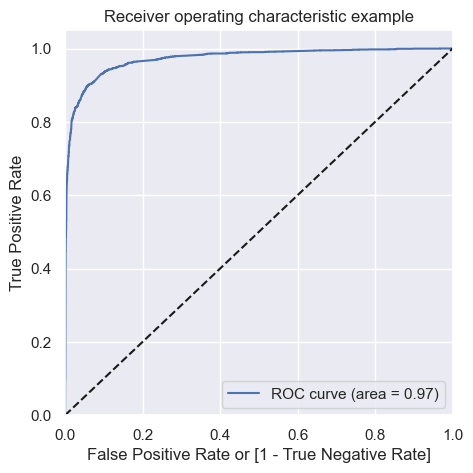

In [247]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [248]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.906159         7962          1    1    1    1    1    1   
1          0        0.098643         5520          0    1    0    0    0    0   
2          0        0.003103         1962          0    1    0    0    0    0   
3          1        0.989595         1566          1    1    1    1    1    1   
4          0        0.285564         9170          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    0    0    0    0    0

In [249]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.838355  0.971476  0.756893
0.2   0.2  0.902072  0.946672  0.874779
0.3   0.3  0.920276  0.908227  0.927650
0.4   0.4  0.925141  0.890037  0.946623
0.5   0.5  0.924670  0.872675  0.956489
0.6   0.6  0.921061  0.842084  0.969390
0.7   0.7  0.918550  0.820174  0.978750
0.8   0.8  0.903955  0.769326  0.986339
0.9   0.9  0.890772  0.727987  0.990387


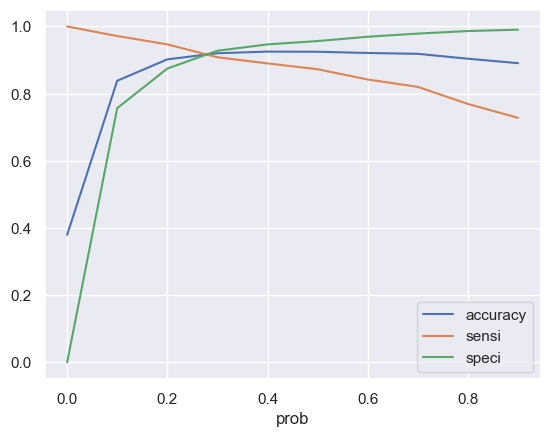

In [250]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Observation:
From the curve above, 0.3 is the optimum point where we see the accuracy, specificity and sensitivity scores are quite close to one another. Therefore, we can take it as a cutoff probability

In [330]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.906159         7962          1    1    1    1    1    1   
1          0        0.098643         5520          0    1    0    0    0    0   
2          0        0.003103         1962          0    1    0    0    0    0   
3          1        0.989595         1566          1    1    1    1    1    1   
4          0        0.285564         9170          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    1                1  
4    0    0    0    0    0                0

In [312]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9202762084118016

In [313]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3667,  286],
       [ 222, 2197]])

In [314]:
TP_2 = confusion2[1,1] # true positive 
TN_2 = confusion2[0,0] # true negatives
FP_2 = confusion2[0,1] # false positives
FN_2 = confusion2[1,0] # false negatives

In [315]:
print(f"True positives 2: {TP_2 :.0f}")
print(f"True negatives 2: {TN_2 :.0f}")
print(f"False positives 2: {FP_2 :.0f}")
print(f"False negatives 2: {FN_2 :.0f}")

True positives 2: 2197
True negatives 2: 3667
False positives 2: 286
False negatives 2: 222


In [316]:
# Let's see the sensitivity of our logistic regression model
Sensitivity = TP_2 / float(TP_2+FN_2)
print(f"Sensitivity score is: {Sensitivity :.2f}")

Sensitivity score is: 0.91


In [317]:
# Let us calculate specificity
Specificity = TN_2 / float(TN_2+FP_2)
print(f"Specificity score is: {Specificity :.2f}")

Specificity score is: 0.93


In [318]:
# Calculate false postive rate
FPR = FP_2/ float(TN_2+FP_2)
print(f"False positive rate is: {FPR :.2f}")

False positive rate is: 0.07


In [319]:
# Calculate the true positive rate
TPR = TP_2 / float(TP_2+FN_2)
print(f"True positive rate is: {TPR :.2f}")

True positive rate is: 0.91


### Precision and Recall

In [320]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3781,  172],
       [ 308, 2111]])

##### Precision
TP / TP + FP

In [331]:
precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
print(f"Precision score is: {precision :.2f}")

Precision score is: 0.92


##### Recall
TP / TP + FN

In [332]:
recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
print(f"Recall score is: {precision :.2f}")

Recall score is: 0.92


Using sklearn utilities for the same

In [323]:
from sklearn.metrics import precision_score, recall_score

In [334]:
precision2 = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f"Precision score is: {precision2 :.2f}")

Precision score is: 0.92


In [336]:
recall2 = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f"Recall score is: {recall2 :.2f}")

Recall score is: 0.87


### Precision and recall tradeoff

In [326]:
from sklearn.metrics import precision_recall_curve

In [327]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      0
 13      0
 14      1
 15      1
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      1
 38      1
 39      1
 40      0
 41      0
 42      0
 43      0
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      0
 51      0
 52      0
 53      0
 54      1
 55      0
 56      1
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      0
 64      1
 65      0
 66      0
 67      1
 68      1
 69      0
 70      0
 71      0
 72      0
 73      0
 74      0
 75      1
 76      0
 77      1
 78      1
 79      1
 80      0
 81      1
 82      0
 83      0
 84      1
 85      1
 86      1
 87      0
 88      1
 89      0
 90      1

In [268]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

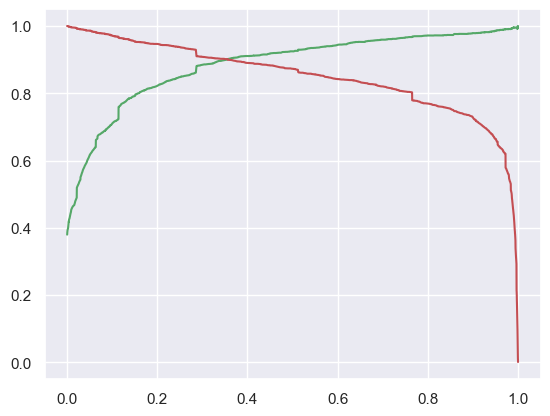

In [328]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 9: Making predictions on the test set

In [270]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [271]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Welingak Website  \
3504                    -0.103815                             0   
4050                    -0.881052                             0   
7201                     0.424120                             0   
1196                    -0.105648                             0   
8219                    -0.428274                             0   

      Last Activity_Email Bounced  Last Activity_SMS Sent  Country_Unknown  \
3504                            0                       0                0   
4050                            0                       1                1   
7201                            0                       1                0   
1196                            0                       0                0   
8219                            0                       0                0   

      What matters most to you in choosing a course_Unknown  \
3504                                                  0       
4050                                                  0       
7201                                                  0       
1196                                                  0       
8219                                                  0       

      Tags_Closed by Horizzon  Tags_Lost to EINS  \
3504                        0                  0   
4050                        0                  0   
7201                        0                  0   
1196                        0                  0   
8219                        0                  1   

      Tags_Not doing further education  Tags_Ringing  \
3504                                 0             1   
4050                                 0             0   
7201                                 0             0   
1196                                 0             1   
8219                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
3504                                         0                    0   
4050                                         1                    0   
7201                                         0                    0   
1196                                         0                    0   
8219                                         0                    0   

      Tags_switched off  Lead Profile_Student of SomeSchool  \
3504                  0                                   0   
4050                  0                                   0   
7201                  0                                   0   
1196                  0                                   0   
8219                  0                                   0   

      Last Notable Activity_Modified  \
3504                               0   
4050                               0   
7201                               0   
1196                               0   
8219                               0   

      Last Notable Activity_Olark Chat Conversation  
3504                                              0  
4050                                              0  
7201                                              0  
1196                                              0  
8219                                              0

In [272]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [273]:
y_test_pred = res.predict(X_test_sm)

In [274]:
y_test_pred[:10]

3504    0.004894
4050    0.996506
7201    0.759916
1196    0.004884
8219    0.993982
8747    0.114030
9048    0.476843
6524    0.022604
7693    0.513576
8187    0.067281
dtype: float64

In [275]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [276]:
# Let's see the head
y_pred_1.head()

0
3504  0.004894
4050  0.996506
7201  0.759916
1196  0.004884
8219  0.993982

In [277]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [278]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [279]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [280]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [281]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3504  0.004894
1          1         4050  0.996506
2          0         7201  0.759916
3          0         1196  0.004884
4          1         8219  0.993982

In [282]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [283]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Converted_Prob'])

In [284]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         3504          0        0.004894
1         4050          1        0.996506
2         7201          0        0.759916
3         1196          0        0.004884
4         8219          1        0.993982

In [359]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [360]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         3504          0        0.004894                0
1         4050          1        0.996506                1
2         7201          0        0.759916                1
3         1196          0        0.004884                0
4         8219          1        0.993982                1

In [361]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9264005858659832

In [362]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1582,  107],
       [  94,  948]])

In [363]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [364]:
print(f"True positives: {TP :.0f}")
print(f"True negatives: {TN :.0f}")
print(f"False positives: {FP :.0f}")
print(f"False negatives: {FN :.0f}")

True positives: 948
True negatives: 1582
False positives: 107
False negatives: 94


In [365]:
# Let's see the sensitivity of our logistic regression model
Sensitivity_final = TP / float(TP+FN)
print(f"Sensitivity score is: {Sensitivity_final :.2f}")

Sensitivity score is: 0.91


In [366]:
# Let us calculate specificity
Specificity_final = TN / float(TN+FP)
print(f"Specificity score is: {Specificity_final :.2f}")

Specificity score is: 0.94


In [367]:
# Calculate false postive rate
FPR = FP/ float(TN+FP)
print(f"False positive rate is: {FPR :.2f}")

False positive rate is: 0.06


In [368]:
# Calculate the true positive rate
TPR = TP / float(TP+FN)
print(f"True positive rate is: {TPR :.2f}")

True positive rate is: 0.91


### Recheck on correlation matrix to define top factors impacting on Converted

In [293]:
df = X_train[col]
df.head()

Total Time Spent on Website  Lead Source_Welingak Website  \
7962                     1.476324                             0   
5520                    -0.771066                             0   
1962                    -0.571257                             0   
1566                     1.393834                             0   
9170                    -0.881052                             0   

      Last Activity_Email Bounced  Last Activity_SMS Sent  Country_Unknown  \
7962                            0                       1                0   
5520                            0                       0                0   
1962                            0                       1                0   
1566                            0                       0                0   
9170                            0                       0                1   

      What matters most to you in choosing a course_Unknown  \
7962                                                  0       
5520                                                  0       
1962                                                  0       
1566                                                  0       
9170                                                  0       

      Tags_Closed by Horizzon  Tags_Lost to EINS  \
7962                        0                  0   
5520                        0                  0   
1962                        0                  0   
1566                        0                  0   
9170                        0                  0   

      Tags_Not doing further education  Tags_Ringing  \
7962                                 0             0   
5520                                 0             0   
1962                                 0             0   
1566                                 0             0   
9170                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
7962                                         0                    0   
5520                                         0                    0   
1962                                         0                    0   
1566                                         1                    0   
9170                                         0                    0   

      Tags_switched off  Lead Profile_Student of SomeSchool  \
7962                  0                                   0   
5520                  0                                   0   
1962                  1                                   0   
1566                  0                                   0   
9170                  0                                   0   

      Last Notable Activity_Modified  \
7962                               0   
5520                               0   
1962                               1   
1566                               0   
9170                               0   

      Last Notable Activity_Olark Chat Conversation  
7962                                              0  
5520                                              0  
1962                                              0  
1566                                              0  
9170                                              0

In [294]:
lead_2.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object', length=102)

In [295]:
#Create a new dataframe just containing the shortlist columns and Converted column
lead_3 = lead_2[['Converted','Total Time Spent on Website',
                 'Lead Source_Welingak Website',
                 'Last Activity_Email Bounced',
                 'Last Activity_SMS Sent', 'Country_Unknown',
                 'Tags_Closed by Horizzon',
                 'Tags_Lost to EINS',
                 'Tags_Not doing further education',
                'Tags_Ringing', 'Tags_Will revert after reading the email',
                'Tags_invalid number', 'Tags_switched off',
                'Lead Profile_Student of SomeSchool',
                'Last Notable Activity_Modified', 
                'Last Notable Activity_Olark Chat Conversation']]

In [296]:
lead_3.columns

Index(['Converted', 'Total Time Spent on Website',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Country_Unknown', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [297]:
# Run correlation matrix among these shortlist factors with Converted

In [298]:
lead_3.head()

Converted  Total Time Spent on Website  Lead Source_Welingak Website  \
0          0                          0.0                             0   
1          0                        674.0                             0   
2          1                       1532.0                             0   
3          0                        305.0                             0   
4          1                       1428.0                             0   

   Last Activity_Email Bounced  Last Activity_SMS Sent  Country_Unknown  \
0                            0                       0                1   
1                            0                       0                0   
2                            0                       0                0   
3                            0                       0                0   
4                            0                       0                0   

   Tags_Closed by Horizzon  Tags_Lost to EINS  \
0                        0                  0   
1                        0                  0   
2                        0                  0   
3                        0                  0   
4                        0                  0   

   Tags_Not doing further education  Tags_Ringing  \
0                                 0             0   
1                                 0             1   
2                                 0             0   
3                                 0             1   
4                                 0             0   

   Tags_Will revert after reading the email  Tags_invalid number  \
0                                         0                    0   
1                                         0                    0   
2                                         1                    0   
3                                         0                    0   
4                                         1                    0   

   Tags_switched off  Lead Profile_Student of SomeSchool  \
0                  0                                   0   
1                  0                                   0   
2                  0                                   0   
3                  0                                   0   
4                  0                                   0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  
0                                              0  
1                                              0  
2                                              0  
3                                              0  
4                                              0

In [299]:
lead_3.corr().round(2)

Converted  \
Converted                                           1.00   
Total Time Spent on Website                         0.35   
Lead Source_Welingak Website                        0.15   
Last Activity_Email Bounced                        -0.13   
Last Activity_SMS Sent                              0.34   
Country_Unknown                                     0.05   
Tags_Closed by Horizzon                             0.23   
Tags_Lost to EINS                                   0.17   
Tags_Not doing further education                   -0.10   
Tags_Ringing                                       -0.28   
Tags_Will revert after reading the email            0.65   
Tags_invalid number                                -0.07   
Tags_switched off                                  -0.12   
Lead Profile_Student of SomeSchool                 -0.12   
Last Notable Activity_Modified                     -0.26   
Last Notable Activity_Olark Chat Conversation      -0.07   

                                               Total Time Spent on Website  \
Converted                                                             0.35   
Total Time Spent on Website                                           1.00   
Lead Source_Welingak Website                                         -0.09   
Last Activity_Email Bounced                                          -0.04   
Last Activity_SMS Sent                                                0.13   
Country_Unknown                                                      -0.47   
Tags_Closed by Horizzon                                               0.04   
Tags_Lost to EINS                                                     0.08   
Tags_Not doing further education                                     -0.02   
Tags_Ringing                                                         -0.05   
Tags_Will revert after reading the email                              0.26   
Tags_invalid number                                                  -0.02   
Tags_switched off                                                    -0.03   
Lead Profile_Student of SomeSchool                                   -0.04   
Last Notable Activity_Modified                                       -0.13   
Last Notable Activity_Olark Chat Conversation                        -0.05   

                                               Lead Source_Welingak Website  \
Converted                                                              0.15   
Total Time Spent on Website                                           -0.09   
Lead Source_Welingak Website                                           1.00   
Last Activity_Email Bounced                                           -0.02   
Last Activity_SMS Sent                                                 0.08   
Country_Unknown                                                        0.19   
Tags_Closed by Horizzon                                                0.07   
Tags_Lost to EINS                                                      0.02   
Tags_Not doing further education                                      -0.02   
Tags_Ringing                                                          -0.05   
Tags_Will revert after reading the email                              -0.04   
Tags_invalid number                                                   -0.01   
Tags_switched off                                                     -0.02   
Lead Profile_Student of SomeSchool                                    -0.02   
Last Notable Activity_Modified                                        -0.03   
Last Notable Activity_Olark Chat Conversation                         -0.01   

                                               Last Activity_Email Bounced  \
Converted                                                            -0.13   
Total Time Spent on Website                                          -0.04   
Lead Source_Welingak Website                                         -0.02   
Last Activity_Email Bounced                

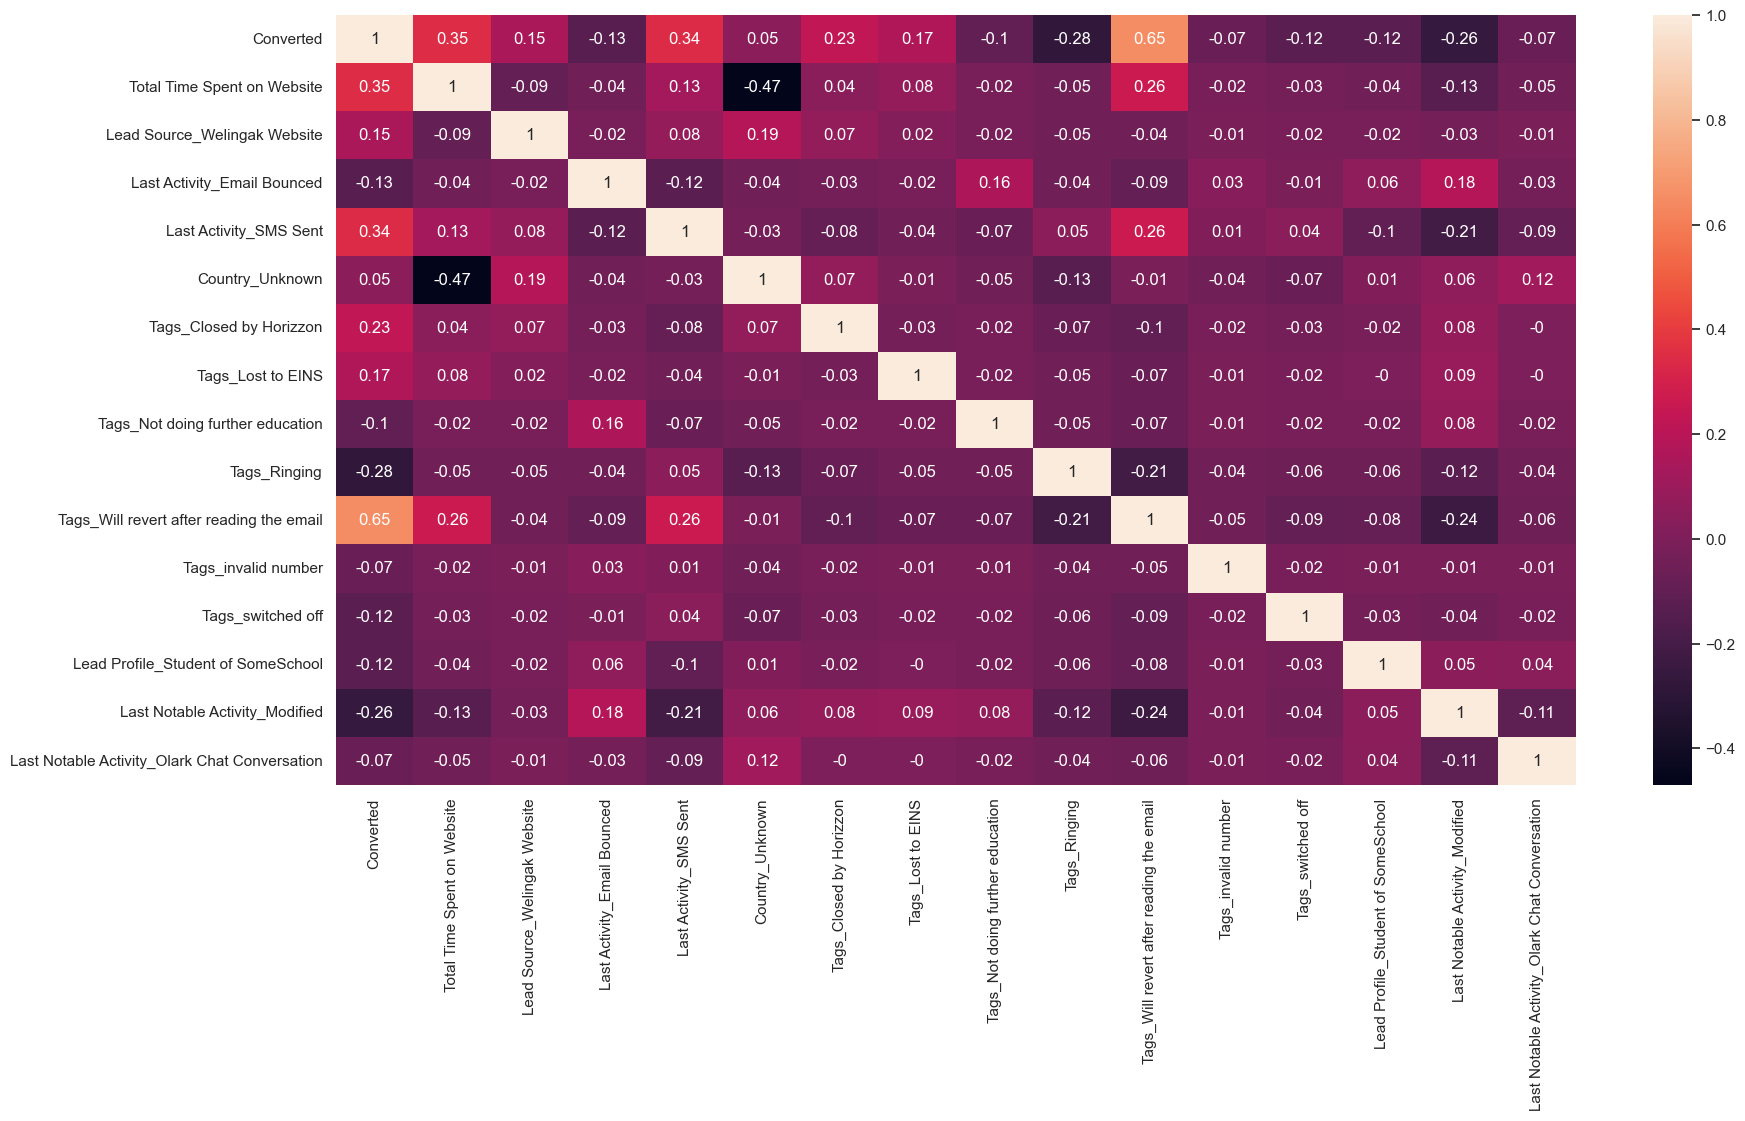

In [329]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_3.corr().round(2),annot = True)
plt.show()

##### Observations:
1. Top 5 variables variables contributing the most towards the probability of a lead getting converted are: 
- `Tags_Will revert after reading the email`: 0.65
- `Total Time Spent on Website`: 0.35
- `Last Activity_SMS Sent`: 0.34
- `Tags_Closed by Horizzon`: 0.23
- `Tags_Lost to EINS`: 0.17

2. Top 3 categorical/ dummy variables we should focus on in order to increase the probability of lead conversions are:
- `Tags_Will revert after reading the email`: 0.65
- `Last Activity_SMS Sent`: 0.34
- `Tags_Closed by Horizzon`: 0.23

3. Bottom 2 variables impact negatively to the conversion:
- `Tags_Ringging`: -0.28
- `Last Activity_Modified`: -0.26

### Run the list of potential lead which only containing high converted probability

In [300]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         3504          0        0.004894                0
1         4050          1        0.996506                1
2         7201          0        0.759916                1
3         1196          0        0.004884                0
4         8219          1        0.993982                1

In [301]:
y_pred_final.shape

(2731, 4)

In [302]:
Potential_Lead = y_pred_final[y_pred_final['final_predicted'] == 1]

In [305]:
Potential_Lead.head(20)

Prospect ID  Converted  Converted_Prob  final_predicted
1          4050          1        0.996506                1
2          7201          0        0.759916                1
4          8219          1        0.993982                1
6          9048          1        0.476843                1
8          7693          0        0.513576                1
12         8743          1        0.996506                1
16         3764          0        0.341920                1
20         2052          1        0.939899                1
22         1925          1        0.997332                1
23         7005          1        0.972224                1
26         8539          1        0.992190                1
31         7556          1        0.649214                1
39         7456          1        0.946094                1
42         1051          1        0.992250                1
43         1991          1        0.999542                1
46         5353          1        0.999317                1
47          995          1        0.880579                1
50          200          1        0.989454                1
52         8582          1        0.972536                1
55         5456          1        0.704523                1

In [304]:
Potential_Lead.shape

(1119, 4)

# THANK YOU!